## Importing Libraries

In [1658]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
colors = {
    'plum': '#b80d48',       # Plum (Red: 184, Green: 13, Blue: 72)
    'orange': '#f29724',     # Orange (Red: 242, Green: 151, Blue: 36)
    'dark_teal': '#2b6a6c',  # Dark Teal (Red: 43, Green: 106, Blue: 108)
    'dark_grey': '#404040'   # Dark Grey (Red: 64, Green: 64, Blue: 64)
}
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import skew
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter
from sklearn.dummy import DummyClassifier

In [1404]:
df_commerce = pd.read_csv("C:/Users/rinit/OneDrive/Desktop/BIA_DSA/Capstone/E_Commerce.csv")
df_commerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


***

## Data Overview

*We will work on a copy of our original dataset so we don't lose any vital information from the modifications we will do further on.*

In [1405]:
df_commerce_copy = df_commerce.copy()

### 1. Basic Information

In [1406]:
df_commerce_copy.shape

(10999, 12)

*There are 12 'Prior_purchases'umns and a total of 10999 records.*

In [1407]:
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<div>

**Dataset Description**
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __ID__ | ID Number of Customers |
| __Warehouse_block__ | The warehouse blocks of the company divided into A, B, C, D and F |
| __Mode_of_Shipment__ | Shipping modes such as Ship, Flight and Road |
| __Customer_care_calls__ | The number of calls made for enquiry of the shipment |
| __Customer_rating__ | Ratings given by customers for the company where: <br> 1 is the lowest <br> 5 is the highest |                     
| __Cost_of_the_Product__ | Cost of the Product in US Dollars |
| __Prior_purchases__ | The number of purchases done previously by customers |  
| __Product_importance__ | Importance of the products categorized into low, medium and high |                      
| __Gender__ | Gender of the customers ie., Male or Female |
| __Discount_offered__ | Amount of Discount offered on that particular product |
| __Weight_in_gms__ | Weight of the product in grams |                      
| __Reached.on.Time_Y.N__ | Target variable; where: <br> 0: On-time delivery <br> 1: Late Delivery <br>  |              

*Let us explore each column individually.*

1. **ID**

In [1408]:
df_commerce_copy['ID'].value_counts()

ID
1        1
7337     1
7329     1
7330     1
7331     1
7332     1
7333     1
7334     1
7335     1
7336     1
7338     1
7348     1
7339     1
7340     1
7341     1
7342     1
7343     1
7344     1
7345     1
7346     1
7328     1
7327     1
7326     1
7325     1
7308     1
7309     1
7310     1
7311     1
7312     1
7313     1
7314     1
7315     1
7316     1
7317     1
7318     1
7319     1
7320     1
7321     1
7322     1
7323     1
7324     1
7347     1
7349     1
7306     1
7380     1
7372     1
7373     1
7374     1
7375     1
7376     1
7377     1
7378     1
7379     1
7381     1
7350     1
7382     1
7383     1
7384     1
7385     1
7386     1
7387     1
7388     1
7389     1
7371     1
7370     1
7369     1
7368     1
7351     1
7352     1
7353     1
7354     1
7355     1
7356     1
7357     1
7358     1
7359     1
7360     1
7361     1
7362     1
7363     1
7364     1
7365     1
7366     1
7367     1
7307     1
7305     1
7391     1
7251     1
7243     1
7244     1
7245   

*Here, we can see that ID is simply the Identification number for the customers. And there are 10999 IDs. \
It is rightly of numerical type.*

2. **Warehouse_block**

In [1409]:
df_commerce_copy['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

*Here, we have four types of warehouses that the company has. Namely, A, B, C, D and F. The shipping of orders is done from these warehouses. \
This is of categorical type.*

3. **Mode_of_Shipment**

In [1410]:
df_commerce_copy['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

*Here, we have three modes of shipment that the customers can choose. By water (ship), air (flight) or on road. \
This is of categorical type.*

4. **Customer_care_calls**

In [1411]:
df_commerce_copy['Customer_care_calls'].value_counts()

Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64

*These are the total number of calls made by the enquiry for information regarding the shipments.*

5. **Customer_rating**

In [1412]:
df_commerce_copy['Customer_rating'].value_counts()

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64

*This column presents the rating for the company by the customers ranging from 1 (Worst) to 5 (Best). \
We see that the datatype is integer hence we need to convert it to a categorical type.*

In [1413]:
df_commerce_copy['Customer_rating'] = df_commerce_copy['Customer_rating'].astype('object')

In [1414]:
df_commerce_copy['Customer_rating'].dtype

dtype('O')

6. **Cost_of_the_Product**

In [1415]:
df_commerce_copy['Cost_of_the_Product'].value_counts()

Cost_of_the_Product
245    110
257    109
260    106
254    101
264    100
243    100
255     98
263     97
258     96
266     93
271     91
233     90
244     90
238     90
261     89
247     89
224     88
250     87
223     86
269     85
268     84
246     83
251     83
249     83
232     83
265     83
270     81
239     81
201     80
253     80
160     80
192     79
229     79
242     78
226     78
252     78
150     78
151     78
259     78
225     78
237     77
240     76
162     76
273     76
248     76
272     75
262     75
267     74
274     74
189     73
236     73
241     72
140     72
149     72
157     72
180     71
134     71
206     71
154     71
202     71
171     71
221     70
156     70
139     70
222     70
219     70
135     69
173     69
256     69
185     69
275     69
168     69
228     67
177     67
198     67
183     67
169     67
234     67
209     66
167     65
181     65
184     65
133     64
161     64
158     64
227     64
231     64
217     63
235     63
1

*This column represents the cost of each shipment in USD.*

7. **'Prior_purchases'**

In [1416]:
df_commerce['Prior_purchases'].value_counts()

Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64

*These are the number of previous orders from customers.*

8. **Product_importance**

In [1417]:
df_commerce_copy['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

*Here, the importance of each product is classfied into three tiers: low, medium and high.*

9. **Gender**

In [1418]:
df_commerce_copy['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

*The number of males and female customers are given in this column.*

10. **Discount_offered**

In [1419]:
df_commerce_copy['Discount_offered'].value_counts()

Discount_offered
10    860
2     858
6     849
9     845
3     840
7     840
4     825
1     824
5     810
8     801
12     72
52     62
48     61
46     61
20     58
37     58
43     56
44     56
23     55
56     54
35     54
63     53
60     53
61     53
39     53
19     53
49     52
47     52
22     52
58     51
29     51
33     51
59     50
54     50
15     49
62     49
38     49
55     48
17     48
41     47
45     47
21     46
11     46
32     46
27     46
51     45
18     45
57     44
28     44
13     44
64     43
34     43
24     43
53     42
14     41
40     40
16     40
50     40
31     38
36     38
65     36
26     36
42     35
25     34
30     34
Name: count, dtype: int64

*This columns gives information about the discount offered on that specific shipment.*

11. **Weight_in_gms**

In [1420]:
df_commerce_copy['Weight_in_gms'].value_counts()

Weight_in_gms
4883    12
1145    10
5783    10
4741    10
5672    10
1005    10
4314    10
4410     9
4887     9
1665     9
5208     9
4562     9
4636     9
1329     9
1511     9
5398     9
1817     9
4632     9
4343     9
1192     9
1434     9
1861     9
1150     9
1837     9
5724     9
1727     9
1657     8
5324     8
5211     8
5735     8
1920     8
4811     8
5749     8
1667     8
5337     8
1367     8
4133     8
1184     8
1716     8
5709     8
4145     8
5154     8
1869     8
5016     8
1247     8
5559     8
4172     8
1304     7
5632     7
1080     7
4243     7
1141     7
4930     7
1551     7
4889     7
4660     7
1691     7
4575     7
4914     7
4195     7
4996     7
1092     7
4208     7
1660     7
1793     7
1113     7
4024     7
1867     7
1711     7
4102     7
5978     7
1021     7
1278     7
1969     7
5502     7
4423     7
5580     7
5703     7
1178     7
5113     7
1648     7
5759     7
4435     7
4486     7
1158     7
5761     7
1246     7
4163     7
5328     7
5881   

*Here, we have the weight of each shipment in grams.*

11. **Reached.on.Time_Y.N**

In [1421]:
df_commerce_copy['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

*Here, this column mentions whether a product has been delivered on time or not where 1 indicates that the product has NOT reached on time and 0 indicates it has reached on time. We convert it to categorical since 0 and 1 are to be labeled.\
This is the target variable.*

In [1422]:
df_commerce_copy['Reached.on.Time_Y.N'] = df_commerce_copy['Reached.on.Time_Y.N'].apply(lambda x: 'No' if x == 1 else 'Yes')

In [1423]:
df_commerce_copy['Reached.on.Time_Y.N'] = df_commerce_copy['Reached.on.Time_Y.N'].astype('object')

In [1424]:
# Checking the datatypes again
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  object
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


### 2. Statistical Information

*Here, we first separate the numerical columns from the categorical columns into two separate lists.*

In [1425]:
num_cols = []
cat_cols = []
for i in df_commerce_copy.columns:
    if df_commerce_copy[str(i)].dtype == 'int64':
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [1426]:
num_cols

['ID',
 'Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [1427]:
cat_cols

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_rating',
 'Product_importance',
 'Gender',
 'Reached.on.Time_Y.N']

Now we can view the statistical information for both

#### Numerical Columns

In [1428]:
df_commerce_copy[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


**Inference**:
* The average number of call from customers per product is 4, the least number of calls being 2 and the most being 7.
* The average cost of the product is 210 USD. The least is 96 USD and highest, 310 USD.
* The average number of prior purchases is 3.5 with the least being 2 and most being 10.
* The average discount offered is 13.3 USD on each product with the cheapest discount being 1 USD and most expensive being 65 USD.
* The average weight per products is 3634.017 gm with the lightest being 1001 gm and the heaviest being 7846 gms

#### Categorical Columns

In [1429]:
df_commerce_copy[cat_cols].describe().T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Customer_rating,10999,5,3,2239
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545
Reached.on.Time_Y.N,10999,2,No,6563


**Inference**:
* There are 5 unique warehouse blocks with block F being the warehouse with most (3666) of the shippings.
* There are 3 mode of shipments and by ship is the most common mode with 7642 products being shipped out on water.
* There are 5 unique customer ratings and 3 (1 being worst and 5 being best) is the most frequent rating given by customers.
* There are 3 types of product importances and most of the products in the dataset are of low importance.
* There are 2 genders in the dataset and  female customers (F) order products the most.
* There are only two categories (0 and 1) to denote whether the product has reached on time or NOT, respectively. Here, 1 is the most occuring category which denotes that most of the products (6563) have NOT reached on time.

***

## EDA

### Univariate Analysis

*Univariate Analysis focuses on one feature at a time to understand its distribution and range. This helps us to know in depth, the nature of each column and it's values.*

In [1430]:
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  object
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


##### 1. Numerical Columns
*Since ID numbers are unique for each product, we know that there is no distribution as such and hence we will ignore this column.*

In [1431]:
num_cols.remove('ID')

In [1432]:
num_cols

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

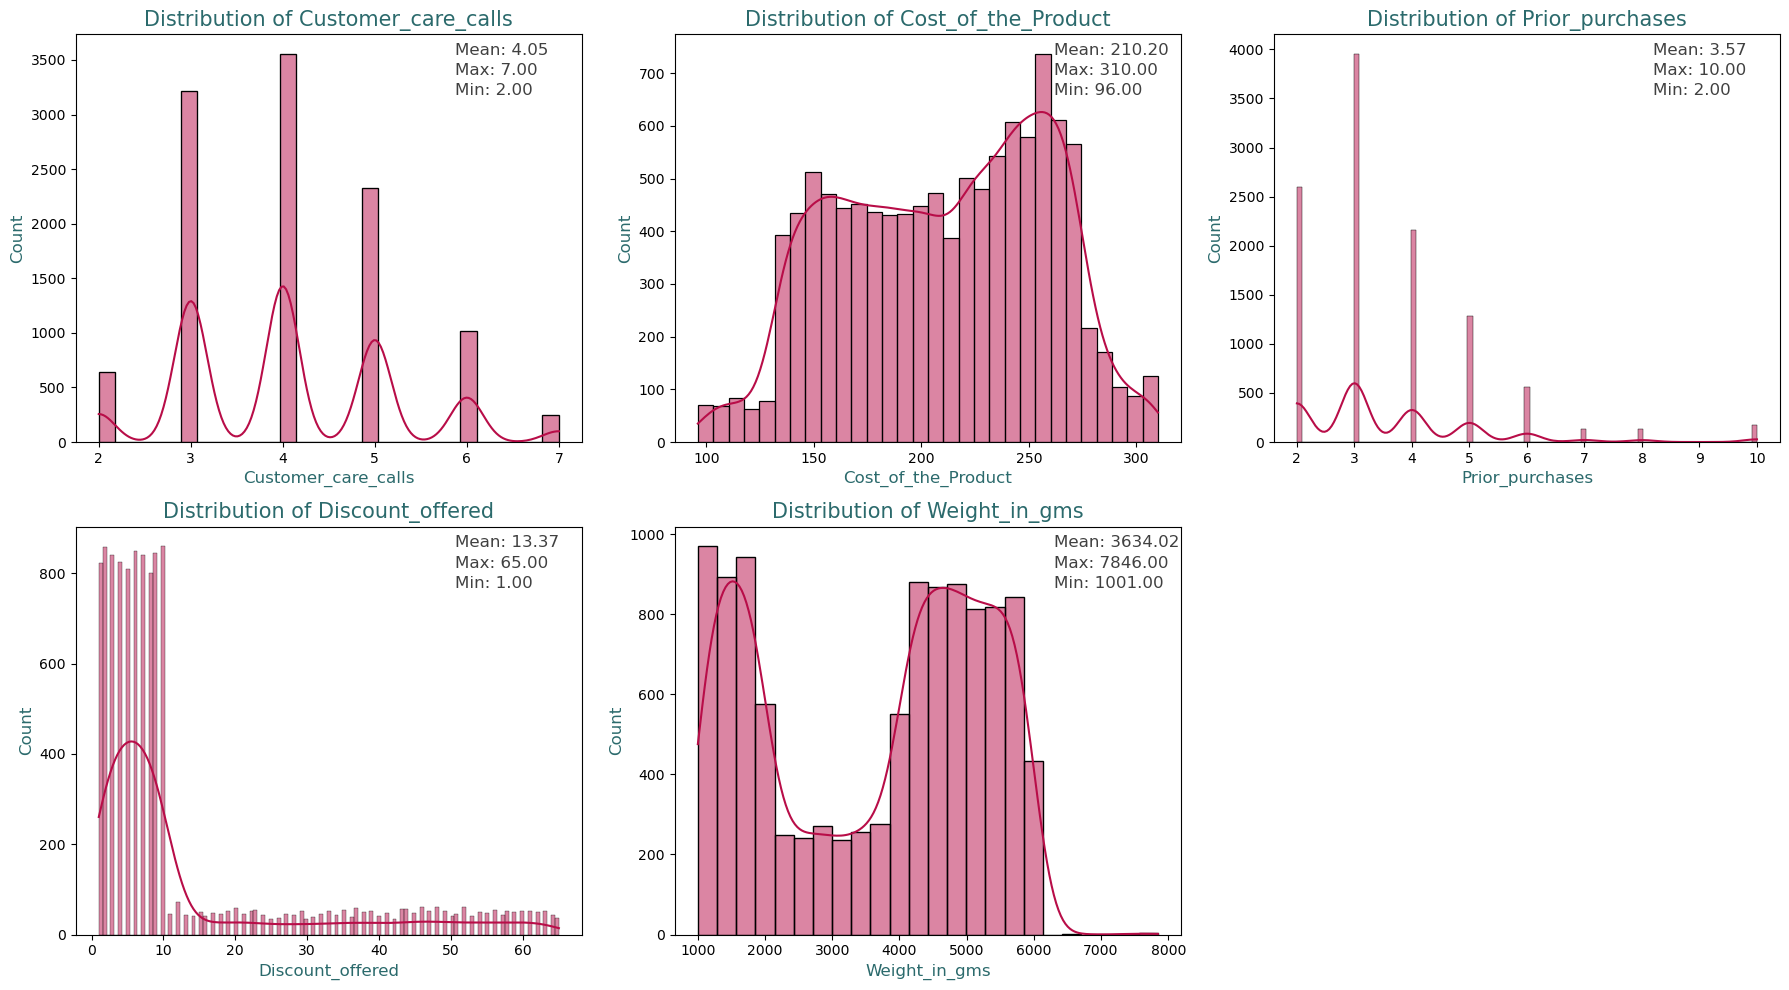

In [1433]:
num_features = len(num_cols)
ncols = 3
nrows = (num_features + ncols - 1) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop to plot histograms for each numerical feature
for i, col in enumerate(num_cols):
    # Plot histogram with KDE
    sns.histplot(df_commerce_copy[col], ax=ax[i], color=colors['plum'], kde=True)

    # Calculate mean, max, and min values for the column
    mean_val = df_commerce_copy[col].mean()
    max_val = df_commerce_copy[col].max()
    min_val = df_commerce_copy[col].min()

    # Set labels and title
    ax[i].set_title(f'Distribution of {col}', fontsize=15, color=colors['dark_teal'])
    ax[i].set_xlabel(col, fontsize=12, color=colors['dark_teal'])
    ax[i].set_ylabel('Count', fontsize=12, color=colors['dark_teal'])

    # Annotate mean, max, and min values to the right of the plot
    ax[i].annotate(f'Mean: {mean_val:.2f}', xy=(0.75, 0.95), xycoords='axes fraction', 
                   fontsize=12, color=colors['dark_grey'], ha='left')
    ax[i].annotate(f'Max: {max_val:.2f}', xy=(0.75, 0.90), xycoords='axes fraction', 
                   fontsize=12, color=colors['dark_grey'], ha='left')
    ax[i].annotate(f'Min: {min_val:.2f}', xy=(0.75, 0.85), xycoords='axes fraction', 
                   fontsize=12, color=colors['dark_grey'], ha='left')

    # Optional: Remove grid lines
    ax[i].grid(False)

# Turn off any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('uni_num_plot.png')
plt.show()

#Image.open('uni_var_plot.png').save('uni_var_plot.jpg','JPEG')

**Information about the Graphs:**
1. ***Customer_care_calls***:
* Distribution: The graph shows a skewed distribution with most customers making 3 to 6 customer care calls.
* Mean: The average number of customer care calls is around 4.05.
* Max: The maximum number of calls made by any customer is 7.
* Min: The minimum number of calls is 2.
* Most customers tend to make a moderate number of calls (3-6), with very few making only 2 calls or as many as 7 calls. This suggests that customer issues or inquiries typically require multiple interactions.
2. ***Cost_of_the_Product***:
* Distribution: The cost distribution appears to be somewhat bimodal with peaks around 100-150 and 250-300 units of currency.
* Mean: The average cost is approximately 210.20 units.
* Max: The highest recorded cost is 310 units.
* Min: The lowest cost is 96 units.
* Inference: There are two main clusters of products, one in the lower cost range and another in the higher cost range. This might indicate the presence of distinct product categories (e.g., budget and premium).
3. ***'Prior_purchases'***:
* Distribution: The distribution is highly skewed towards lower numbers of prior purchases, with a sharp drop-off as the number of prior purchases increases.
* Mean: The average number of prior purchases is 3.57.
* Max: The maximum number of prior purchases is 10.
* Min: The minimum number of prior purchases is 2.
* Inference: Most customers have made between 2 to 4 prior purchases, indicating that this is a common range of loyalty or repeat buying behavior. Few customers have made a very high number of prior purchases.
4. ***Discount_offered***:
* Distribution: The discount distribution is heavily skewed towards lower discounts, with a sharp drop-off after about 10 units.
* Mean: The average discount offered is 13.37 units.
* Max: The highest discount offered is 65 units.
* Min: The lowest discount offered is 1 unit.
* Inference: Most products are offered with relatively low discounts, and only a small fraction of products receive substantial discounts. This might suggest that high discounts are used sparingly, possibly for clearance or promotional items.
5. ***Weight_in_gms***:
* Distribution: The weight distribution shows a bimodal pattern, with peaks around 1000-2000 grams and 4000-5000 grams.
* Mean: The average weight is 3634.02 grams.
* Max: The heaviest product weighs 7846 grams.
* Min: The lightest product weighs 1001 grams.
* Inference: There are two main clusters of products by weight, which may correspond to different categories of products (e.g., light vs. heavy goods). The bimodal distribution suggests a clear separation in product types based on weight.

##### 2. Categorical Variables:
*For categorical data, we will use bar plots to visualize the different cohorts to get insights.*

In [1434]:
cat_cols

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_rating',
 'Product_importance',
 'Gender',
 'Reached.on.Time_Y.N']

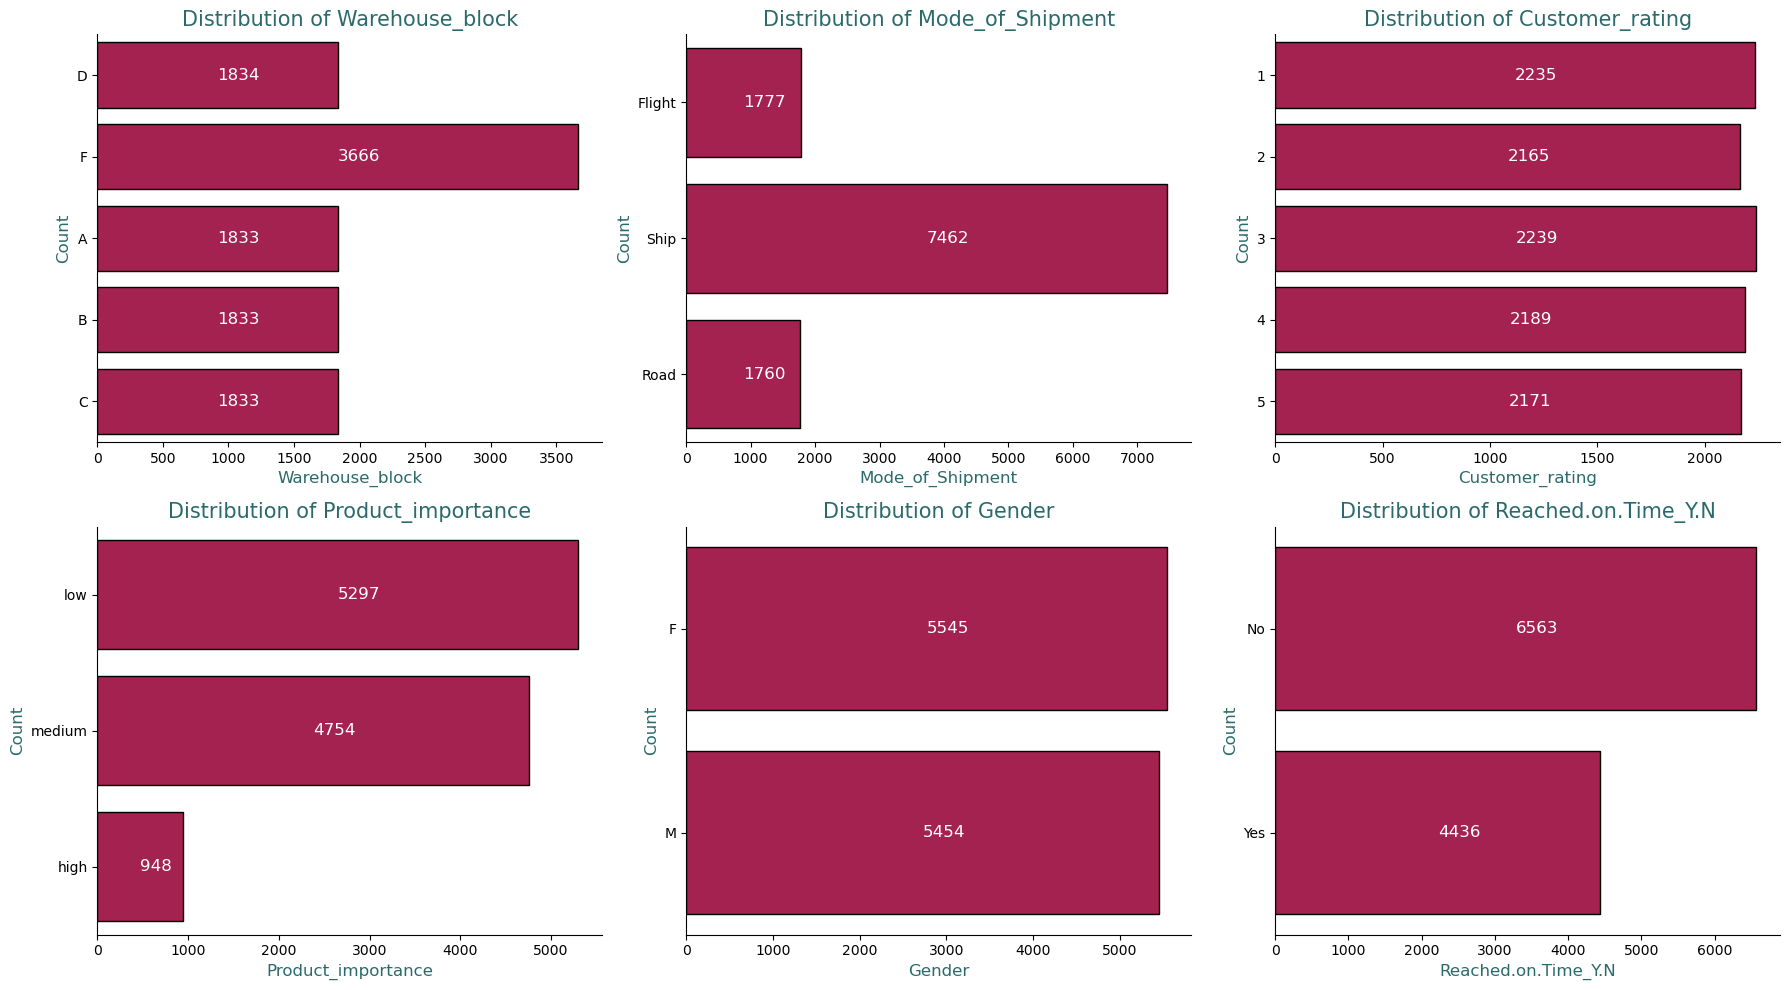

In [1435]:
# Set up the subplot grid
num_features = len(cat_cols)
ncols = 3
nrows = (num_features + ncols - 1) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop to plot bar plots for each categorical feature
for i, col in enumerate(cat_cols):
    # Plot bar plot without hue
    sns.countplot(y=col, data=df_commerce_copy, color=colors['plum'], 
                  ax=ax[i], edgecolor='black')

    # Set labels and title
    ax[i].set_title(f'Distribution of {col}', fontsize=15, color=colors['dark_teal'])
    ax[i].set_xlabel(col, fontsize=12, color=colors['dark_teal'])
    ax[i].set_ylabel('Count', fontsize=12, color=colors['dark_teal'])

    # Annotate category counts to the right of each bar
    for p in ax[i].patches:
        count = int(p.get_width())  # Get the count for the category
        ax[i].annotate(f'{count}', xy=(p.get_width()*0.5, p.get_y() + p.get_height()/2),
                       fontsize=12, color='white', va='center', ha='left')

    # Optional: Remove grid lines
    ax[i].grid(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
# Turn off any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and show the plot
plt.savefig('uni_cat_plot.png')
plt.tight_layout()
plt.show()

**Information about the Graphs:**
1. **Warehouse_block**:
* Maximum products are shipped from the F Block ie., 3666 producst.
* A, B, C and D blocks all have the same number of products being shipped.
* Inference: This could mean that most of the orders placed by customers are being stored and shipped from block F.
2. **Mode_of_Shipment**:
* Most of the products have been shipped out by ship with the number being 7462.
* Flight and Road both have almost the same number of products being shipped.
* Inference: This could mean that the customers prefers their shimpments arriving on water rather than air or on road.
3. **Customer_rating**:
* The customer rating is very equally distributed among all five categories with 3 (middle) having the most number of votes.
* Inference: The customers seems to have equally varying opinions on the delivery time.
4. **Product_importance**:
* Most products being shipped are of low importance (5297 products) as compared to the other two categories.
* Inference: Most customers seem to order products of low importance with a very few orders with being high importance.
5. **Gender**:
* Both the gender seem to order equally with the number of female customers (F) being very slightly larger.
6. **Reached.on.Time_Y.N**:
* Most of the votes are for 1 which suggests that a majority of the shipments have NOT been delivered on time.

### Bivariate Analysis:
*It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.*

In [1436]:
num_cols

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

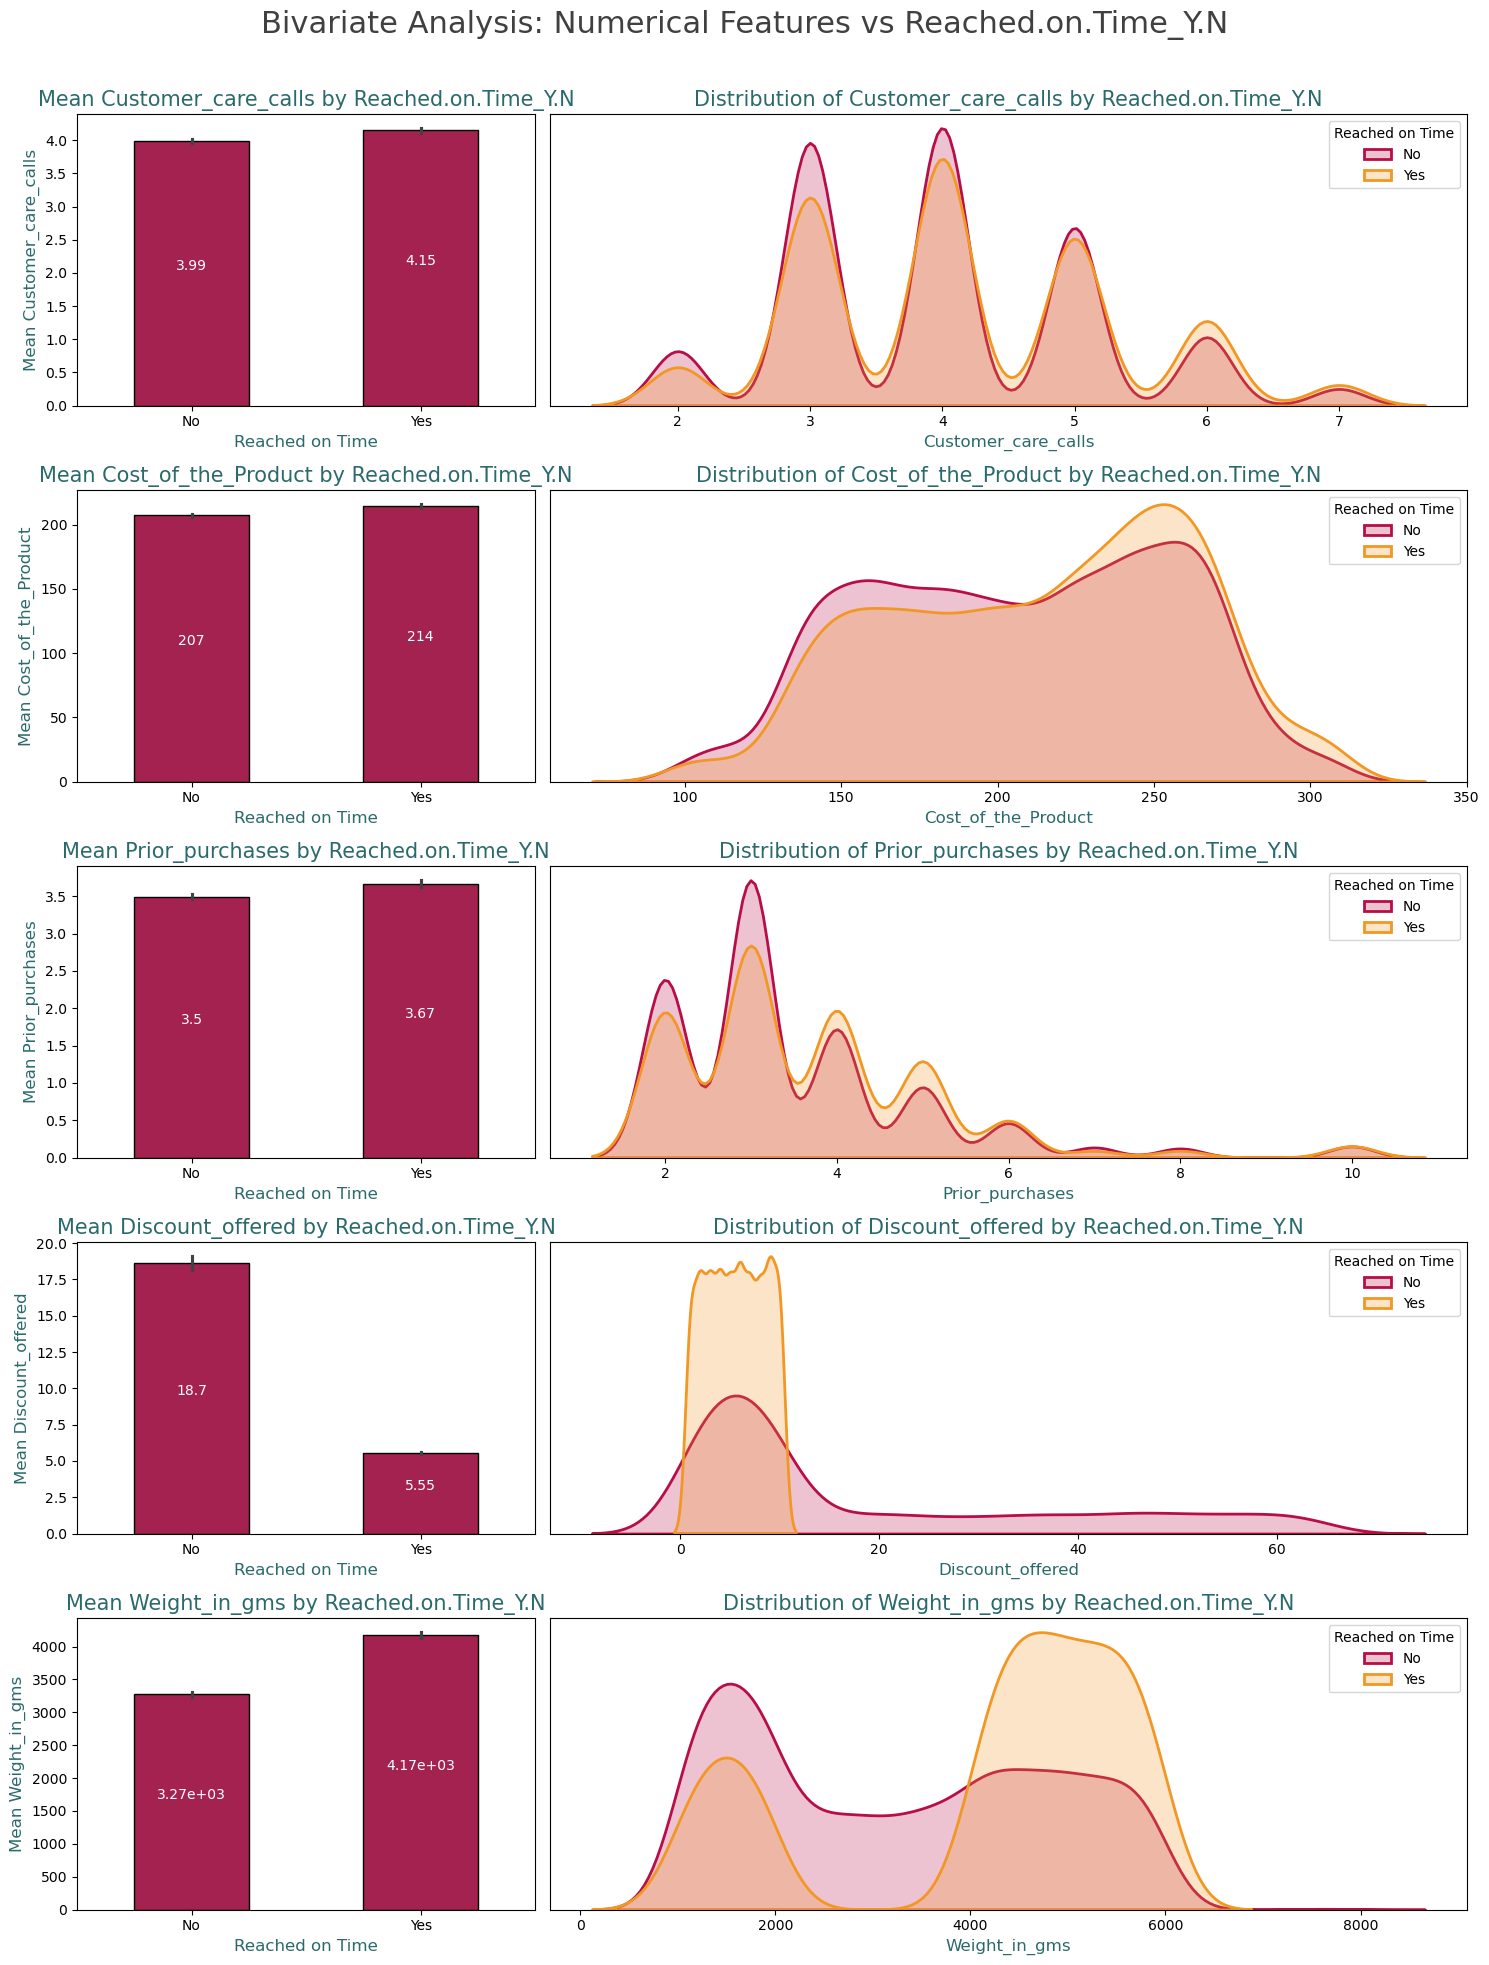

In [1437]:
# Set color palette
sns.set_palette([colors['plum'], colors['orange']])

# Create the subplots with adjusted height for shorter plots
fig, ax = plt.subplots(len(num_cols), 2, figsize=(15, len(num_cols)*4), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each numerical feature to create barplots and KDE plots
for i, col in enumerate(num_cols):
    # Barplot showing the mean value of the feature for each target category with thinner bars
    barplot = sns.barplot(data=df_commerce_copy, x="Reached.on.Time_Y.N", y=col, ax=ax[i, 0], edgecolor='black', width=0.5)
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df_commerce_copy[df_commerce_copy["Reached.on.Time_Y.N"] == 'No'], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='No')
    sns.kdeplot(data=df_commerce_copy[df_commerce_copy["Reached.on.Time_Y.N"] == 'Yes'], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='Yes')
    
    ax[i, 1].set_yticks([])  # Hide y-axis ticks for the KDE plots
    ax[i, 1].legend(title='Reached on Time', loc='upper right')
    
    # Set titles and labels
    ax[i, 0].set_title(f'Mean {col} by Reached.on.Time_Y.N', fontsize=15, color=colors['dark_teal'])
    ax[i, 0].set_xlabel('Reached on Time', fontsize=12, color=colors['dark_teal'])
    ax[i, 0].set_ylabel(f'Mean {col}', fontsize=12, color=colors['dark_teal'])
    
    ax[i, 1].set_title(f'Distribution of {col} by Reached.on.Time_Y.N', fontsize=15, color=colors['dark_teal'])
    ax[i, 1].set_xlabel(col, fontsize=12, color=colors['dark_teal'])
    ax[i, 1].set_ylabel('', fontsize=12, color=colors['dark_teal'])
    
    # Add mean values to the barplot with white color inside the bars
    for cont in barplot.containers:
        barplot.bar_label(cont, fmt='%.3g', label_type='center', padding=5, color='white')

# Set the title for the entire figure
plt.suptitle('Bivariate Analysis: Numerical Features vs Reached.on.Time_Y.N', fontsize=22, color=colors['dark_grey'])
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for the main title
plt.savefig('bi_num_plot.png')
plt.show()


1. **Customer Care Calls vs. Reached on Time:**
   - **Barplot:** The mean number of customer care calls is slightly higher for products that did not reach on time (`3.99` vs `3.92`).
   - **KDE Plot:** The distribution of customer care calls is similar for both outcomes. The peaks indicate that most orders involve 3 to 4 customer care calls regardless of whether the product reached on time.

2. **Cost of the Product vs. Reached on Time:**
   - **Barplot:** The mean cost of the product is nearly identical between orders that did and did not reach on time (`214` vs `217`).
   - **KDE Plot:** The distribution shows a slight difference in product cost, with a higher density of lower-cost products not reaching on time. However, higher-cost products tend to have a similar distribution across both outcomes.

3. **Prior Purchases vs. Reached on Time:**
   - **Barplot:** The mean number of prior purchases is similar for both groups (`3.5` for products that did not reach on time, `3.7` for those that did).
   - **KDE Plot:** The distributions are similar, indicating that prior purchases do not significantly affect whether a product reaches on time or not. There are multiple peaks, suggesting varying patterns in prior purchase behavior.

4. **Discount Offered vs. Reached on Time:**
   - **Barplot:** The mean discount offered is significantly higher for products that did not reach on time (`19.7%` vs `5.55%`).
   - **KDE Plot:** The distribution clearly shows that products with higher discounts are more likely to be delayed. This indicates a potential correlation between larger discounts and delivery delays.

5. **Weight in Grams vs. Reached on Time:**
   - **Barplot:** The mean weight is significantly lower for products that did not reach on time (`3274` g vs `4194` g).
   - **KDE Plot:** The distribution suggests that lighter products are more likely to be delayed. The density is higher at lower weights for products not reaching on time, while the distribution is more spread out for products that did reach on time.

**Inferences:**
- **Customer Care Calls:** The number of calls is similar across both outcomes, suggesting it does not heavily influence delivery time.
- **Cost of Product:** Product cost does not significantly impact whether it reaches on time.
- **Prior Purchases:** The number of prior purchases shows no strong correlation with delivery time.
- **Discount Offered:** Higher discounts are associated with a greater likelihood of delays.
- **Weight:** Lighter products tend to have a higher probability of being delayed.

Hence, we can consider dropping `Customer Care Calls`, `Cost of Product` and `Prior Purchases` columns since the distributions are similary for both delayed and on-time shipping.

In [1438]:
cat_cols

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_rating',
 'Product_importance',
 'Gender',
 'Reached.on.Time_Y.N']

*Since Reached.on.Time_Y.N is our target variable and we want to see the distribution of the columns with respect to it, we shall remove it from our list.*

In [1439]:
cat_cols.remove('Reached.on.Time_Y.N')

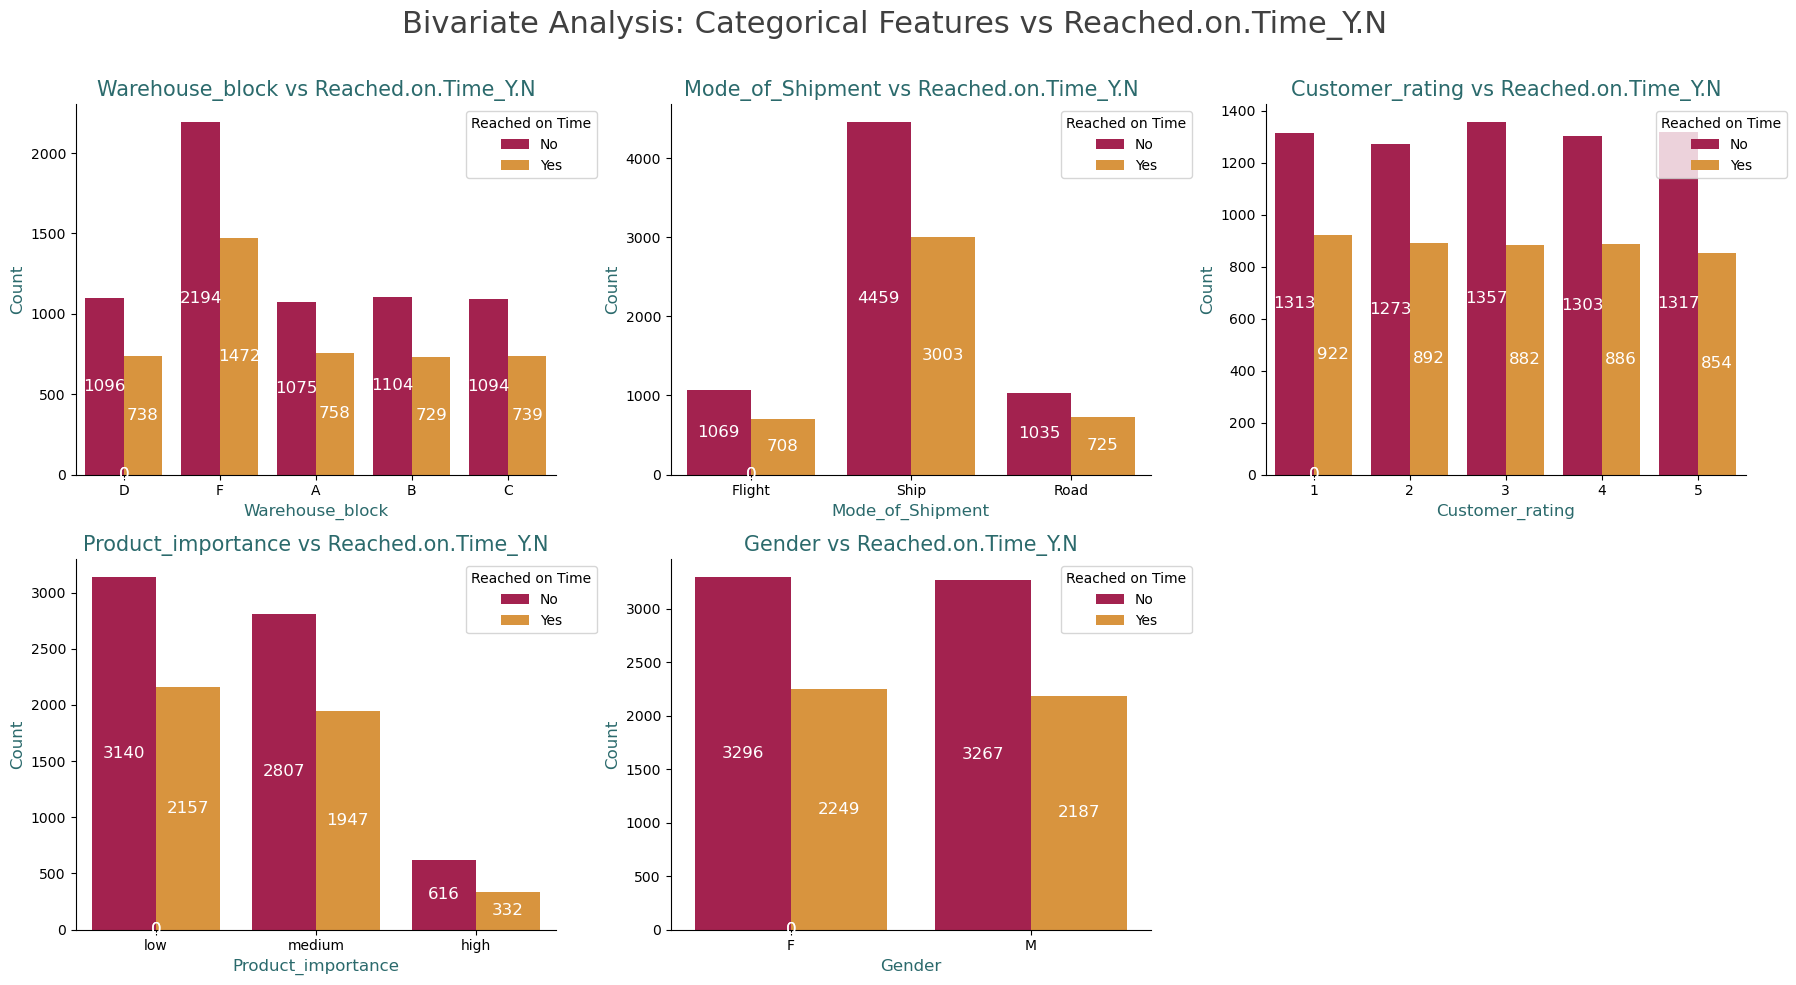

In [1440]:
# Set up the subplot grid for categorical features
num_features = len(cat_cols)
ncols = 3
nrows = (num_features + ncols - 1) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop to plot count plots for each categorical feature against the target variable
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=df_commerce_copy, 
                  palette=[colors['plum'], colors['orange']], ax=ax[i])

    # Set labels and title
    ax[i].set_title(f'{col} vs Reached.on.Time_Y.N', fontsize=15, color=colors['dark_teal'])
    ax[i].set_xlabel(col, fontsize=12, color=colors['dark_teal'])
    ax[i].set_ylabel('Count', fontsize=12, color=colors['dark_teal'])

    # Annotate category counts on each bar
    for p in ax[i].patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax[i].annotate(f'{int(height)}', xy=(x, y), ha='center', va='center',
                       fontsize=12, color='white')

    # Position the legend at the top right
    ax[i].legend(title='Reached on Time', loc='upper right', bbox_to_anchor=(1.1, 1))

    # Optional: Remove grid lines and spines
    ax[i].grid(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

# Turn off any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and show the plot
plt.suptitle('Bivariate Analysis: Categorical Features vs Reached.on.Time_Y.N', fontsize=22, color=colors['dark_grey'])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('bi_cat_plot.png')
plt.show()


1. **Warehouse Block vs. Reached on Time:**
     - Products from Warehouse Block F have the highest delay, with a significantly larger number of products not reaching on time compared to those that did.
     - Blocks A, B, C, and D have a more balanced distribution between on-time and delayed deliveries, with Block D showing the least delays.

2. **Mode of Shipment vs. Reached on Time:**
     - Shipments sent by **Ship** are the most delayed, with a much higher count of products not reaching on time.
     - **Flight** and **Road** shipments have fewer delays, with **Flight** showing a slightly lesser proportion of on-time deliveries compared to **Road**.

3. **Customer Rating vs. Reached on Time:**
     - Across all customer ratings (1 to 5), there are more delayed products than on-time deliveries.
     - There is no clear pattern indicating that higher or lower customer ratings correlate strongly with on-time delivery.

4. **Product Importance vs. Reached on Time:**
     - Products with **low** and **medium** importance are more likely to be delayed, with a substantial difference between delayed and on-time deliveries.
     - Products with **high** importance have fewer deliveries overall, but they also show fewer delays, suggesting that product importance may influence the likelihood of on-time delivery.

5. **Gender vs. Reached on Time:**
     - There is a similar pattern for both **Male** and **Female** customers, with more products being delayed than reaching on time.
     - Gender does not appear to have a significant impact on whether a product is delivered on time.

**Inferences:**
- **Warehouse Block** and **Mode of Shipment** are the most significant factors influencing delivery delays, particularly for Block F and Ship mode.
- **Customer Rating** and **Gender** do not show a strong correlation with on-time delivery. We can consider dropping these two columns for our data preprocessing.
- **Product Importance** plays a role, with high-importance products being more likely to be delivered on time.

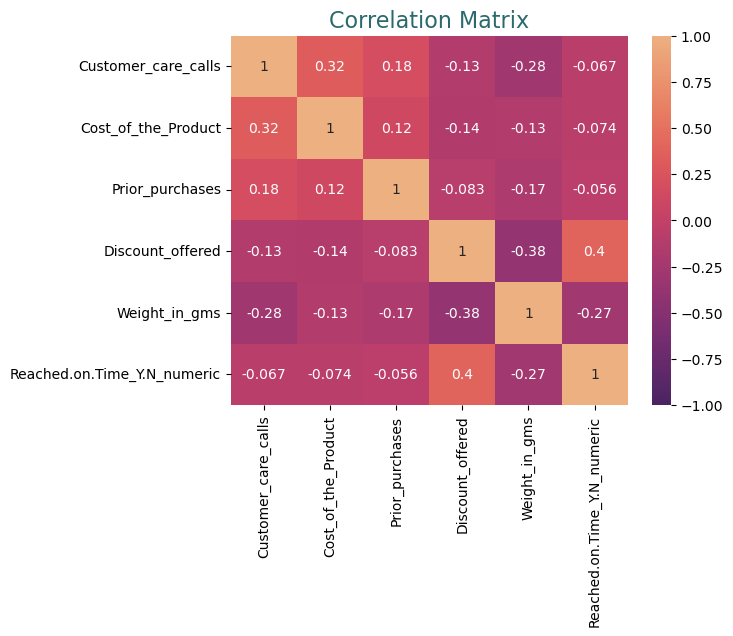

In [1441]:
# Convert the target variable to numerical for correlation analysis
df_commerce_copy['Reached.on.Time_Y.N_numeric'] = df_commerce_copy['Reached.on.Time_Y.N'].apply(lambda x: 1 if x == 'No' else 0)

# Compute the correlation matrix
corr_matrix = df_commerce_copy[num_cols + ['Reached.on.Time_Y.N_numeric']].corr()

# Plot the heatmap
# plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare_r', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16, color=colors['dark_teal'])
plt.show()


1. **Discount Offered and Reached on Time (0.4)**:
   - **Positive Correlation**: There is a moderate positive correlation between `Discount_offered` and `Reached.on.Time_Y.N_numeric` (the numerical representation of the target variable). This suggests that higher discounts are associated with a higher likelihood of reaching on time.

2. **Weight in Grams and Reached on Time (-0.27)**:
   - **Negative Correlation**: There is a moderate negative correlation between `Weight_in_gms` and `Reached.on.Time_Y.N_numeric`. Lighter products tend to be delayed more often than heavier ones. This aligns with the observation that lighter items might be easier to misplace or have different logistical considerations.

3. **Discount Offered and Weight in Grams (-0.38)**:
   - **Negative Correlation**: There is a moderate negative correlation between `Discount_offered` and `Weight_in_gms`. This suggests that heavier products tend to receive lower discounts, potentially because they are less prone to delays and require less incentive for purchase.

4. **Customer Care Calls and Cost of the Product (0.32)**:
   - **Positive Correlation**: There is a moderate positive correlation between `Customer_care_calls` and `Cost_of_the_Product`. More expensive products tend to generate more customer care calls, likely due to the higher expectations or concerns associated with costlier items.

5. **Customer Care Calls and Weight in Grams (-0.28)**:
   - **Negative Correlation**: There is a moderate negative correlation between `Customer_care_calls` and `Weight_in_gms`. Heavier products tend to receive fewer customer care calls, possibly because their handling and delivery are more straightforward.

6. **Customer Care Calls and Reached on Time (-0.067)**:
   - **Weak Negative Correlation**: The correlation between `Customer_care_calls` and `Reached.on.Time_Y.N_numeric` is weak and negative, suggesting that more customer care calls are slightly associated with delays, although the relationship is not strong.

7. **Cost of the Product and Reached on Time (-0.074)**:
   - **Weak Negative Correlation**: The correlation between `Cost_of_the_Product` and `Reached.on.Time_Y.N_numeric` is weak and negative, indicating that higher-cost products are slightly more prone to delays, but the relationship is minimal.

8. **Prior Purchases and Reached on Time (-0.056)**:
   - **Weak Negative Correlation**: The correlation between `'Prior_purchases'` and `Reached.on.Time_Y.N_numeric` is weak and negative, showing that previous purchase history has a negligible impact on delivery time.

**Overall Interpretation:**
- **Discount Offered** and **Weight in Grams** are the most influential variables in determining whether a product reaches on time, as indicated by their moderate correlations with the target variable.
- **Customer Care Calls** and **Cost of the Product** show moderate correlations with other variables but have weak correlations with whether the product reaches on time.
- Most of the variables have weak correlations with the target variable, suggesting that no single factor alone strongly determines delivery success, but a combination of factors may contribute.

***

## Data Pre-Processing

### Feature Removal:

In [1442]:
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           10999 non-null  int64 
 1   Warehouse_block              10999 non-null  object
 2   Mode_of_Shipment             10999 non-null  object
 3   Customer_care_calls          10999 non-null  int64 
 4   Customer_rating              10999 non-null  object
 5   Cost_of_the_Product          10999 non-null  int64 
 6   Prior_purchases              10999 non-null  int64 
 7   Product_importance           10999 non-null  object
 8   Gender                       10999 non-null  object
 9   Discount_offered             10999 non-null  int64 
 10  Weight_in_gms                10999 non-null  int64 
 11  Reached.on.Time_Y.N          10999 non-null  object
 12  Reached.on.Time_Y.N_numeric  10999 non-null  int64 
dtypes: int64(7), object(6)
memory u

*From the above columns, we can say that the `ID` column has no importance towards the analysis and hence we can drop that column.*

In [1443]:
df_commerce_copy.drop('ID',axis=1, inplace=True)

In [1444]:
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Warehouse_block              10999 non-null  object
 1   Mode_of_Shipment             10999 non-null  object
 2   Customer_care_calls          10999 non-null  int64 
 3   Customer_rating              10999 non-null  object
 4   Cost_of_the_Product          10999 non-null  int64 
 5   Prior_purchases              10999 non-null  int64 
 6   Product_importance           10999 non-null  object
 7   Gender                       10999 non-null  object
 8   Discount_offered             10999 non-null  int64 
 9   Weight_in_gms                10999 non-null  int64 
 10  Reached.on.Time_Y.N          10999 non-null  object
 11  Reached.on.Time_Y.N_numeric  10999 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


*As mentioned in the EDA, there are a few columns we can consider dropping. Let us cross-check those using the VIF (Variance Inflation Factor).*

#### Feature Importance - Numerical Columns

In [1445]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Independent variables set
vif_df = df_commerce_copy[num_cols]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
1,Cost_of_the_Product,16.729226
0,Customer_care_calls,13.312730
2,Prior_purchases,6.238112
4,Weight_in_gms,4.482598
3,Discount_offered,1.605862


Generally, VIF above 10 means that particular variable can't be used for modelling and the multicollinearity is severe. As we can see from the above results, we have several features that will cause multicollinearity problem, namely:
1. `Cost_of_the_Product`
2. `Customer_care_calls`

To determine which one to remove, we'll compare their strength to the target variable, `Reached.on.Time_Y.N_numeric` in our heatmap:
1. `Cost_of_the_Product` = -0.074
2. `Customer_care_calls` = -0.067

Because `Customer_care_calls` have multicollinearity problem and weaker correlation with the target, we'll drop `Customer_care_calls` later in the preprocessing stage.

#### Feature Importance - Categorical Columns

In [1446]:
target_variable = 'Reached.on.Time_Y.N'

# Initialize a dictionary to store results
chi_square_results = {}

# Loop through each categorical column
for col in cat_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df_commerce_copy[col], df_commerce_copy[target_variable])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi_square_results[col] = {'Chi2 Stat': chi2, 'p-value': p}
    
    # Print the results
    print(f"Variable: {col}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    
    # Check if the p-value is less than 0.05 (significance level)
    if p < 0.05:
        print(f"There is a significant association between {col} and {target_variable}.\n")
    else:
        print(f"There is no significant association between {col} and {target_variable}.\n")

# If needed, you can also convert the results dictionary to a DataFrame for a more organized output
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df


Variable: Warehouse_block
Chi-Square Statistic: 1.0893868307263042
P-Value: 0.8959524278243698
There is no significant association between Warehouse_block and Reached.on.Time_Y.N.

Variable: Mode_of_Shipment
Chi-Square Statistic: 0.7434357246718559
P-Value: 0.6895487627593785
There is no significant association between Mode_of_Shipment and Reached.on.Time_Y.N.

Variable: Customer_rating
Chi-Square Statistic: 3.200045474831146
P-Value: 0.5249236018493662
There is no significant association between Customer_rating and Reached.on.Time_Y.N.

Variable: Product_importance
Chi-Square Statistic: 12.211163824831024
P-Value: 0.002230383104745087
There is a significant association between Product_importance and Reached.on.Time_Y.N.

Variable: Gender
Chi-Square Statistic: 0.22307980845395214
P-Value: 0.6367032124181522
There is no significant association between Gender and Reached.on.Time_Y.N.



,Chi2 Stat,p-value
Warehouse_block,1.089387,0.895952
Mode_of_Shipment,0.743436,0.689549
Customer_rating,3.200045,0.524924
Product_importance,12.211164,0.002230
Gender,0.223080,0.636703


*From the above chi-square analysis and the EDA for categorical variables, we can see that `Customer_rating` and `Gender` truly have no significance for modelling.*

*We will confirm this using a random forest later on. Let us retain these columns for now.*

*First, let us drop `Customer_care_calls` from the numerical columns and check the resulting VIF.*

#### Removing Features

In [1447]:
df_commerce_copy.drop('Customer_care_calls', axis=1, inplace=True)

In [1448]:
num_cols

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [1449]:
num_cols.remove('Customer_care_calls')
vif_removed = df_commerce_copy[num_cols]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_removed.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_removed.values, i)
                          for i in range(len(vif_removed.columns))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
0,Cost_of_the_Product,9.241904
1,Prior_purchases,5.725384
3,Weight_in_gms,4.476167
2,Discount_offered,1.601669


*Now there's no more feature that has VIF > 10 and cause further multicollinearity.*

#### Feature Extraction

##### Product Cost Class
This is a new feature that groups several ranges of values in the `Cost_of_the_Product` feature. We will base the grouping by its quantiles.

In [1450]:
np.quantile(df_commerce_copy['Cost_of_the_Product'], np.linspace(0, 1, 7))

array([ 96., 156., 184., 214., 240., 261., 310.])

From the quantile result above, we'll divide the grouping range by:

- Low = Orders with product that costs < \$185
- Medium = Orders with product that costs between \$185 - \$241
- High = Orders with product that costs > \$241

In [1451]:
# Product cost class creation
def cost_classifier(Cost_of_the_Product):
    if Cost_of_the_Product < 185:
        return 'low'
    elif Cost_of_the_Product < 241:
        return 'medium'
    else:
        return 'high'

df_commerce_copy['Cost_class'] = df_commerce_copy['Cost_of_the_Product'].apply(cost_classifier)

In [1452]:
df_commerce_copy['Cost_class'].value_counts()

Cost_class
low       3691
medium    3662
high      3646
Name: count, dtype: int64

In [1453]:
df_commerce_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Warehouse_block              10999 non-null  object
 1   Mode_of_Shipment             10999 non-null  object
 2   Customer_rating              10999 non-null  object
 3   Cost_of_the_Product          10999 non-null  int64 
 4   Prior_purchases              10999 non-null  int64 
 5   Product_importance           10999 non-null  object
 6   Gender                       10999 non-null  object
 7   Discount_offered             10999 non-null  int64 
 8   Weight_in_gms                10999 non-null  int64 
 9   Reached.on.Time_Y.N          10999 non-null  object
 10  Reached.on.Time_Y.N_numeric  10999 non-null  int64 
 11  Cost_class                   10999 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.0+ MB


In [1454]:
df_commerce_copy['Cost_class'].value_counts()

Cost_class
low       3691
medium    3662
high      3646
Name: count, dtype: int64

In [1455]:
df_commerce_copy['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
No     6563
Yes    4436
Name: count, dtype: int64

C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\1549272645.py:20: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pc['Prop'] = round(pc['Freq'] / pc.groupby('Cost_class')['Freq'].transform(sum) * 100, 2)
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\1549272645.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pc.pivot_table(index='Cost_class', columns='Reached.on.Time_Y.N_numeric', values='Prop').plot(kind='bar', stacked=True, ax=axes[1])


<Figure size 1000x500 with 0 Axes>

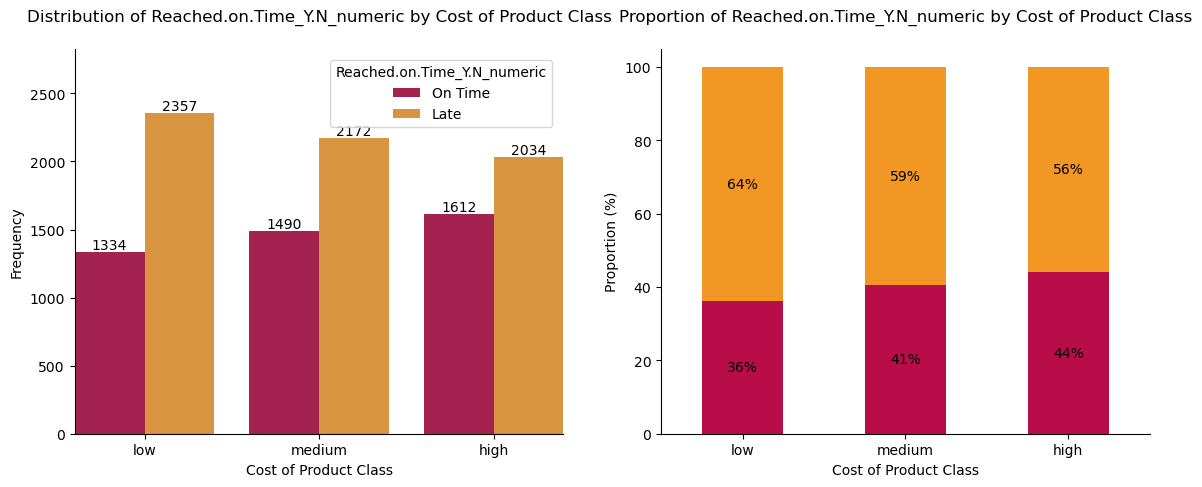

In [1456]:
plt.figure(figsize=(10, 5))

# Frequency base
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(right=1.2)
sns.despine(right=True)

sns.countplot(ax=axes[0], x=df_commerce_copy['Cost_class'], hue=df_commerce_copy['Reached.on.Time_Y.N_numeric'].sort_values(), order=['low', 'medium', 'high'])

axes[0].bar_label(axes[0].containers[0], label_type='edge', fontweight='normal')
axes[0].bar_label(axes[0].containers[1], label_type='edge', fontweight='normal')

axes[0].set(ylabel='Frequency', xlabel='Cost of Product Class')
axes[0].set_title('Distribution of Reached.on.Time_Y.N_numeric by Cost of Product Class', y=1.05)
axes[0].legend(['On Time', 'Late'], loc=0, ncol=1, title='Reached.on.Time_Y.N_numeric', borderaxespad=0.8)
axes[0].margins(0, 0.2)

# Proportion base
pc = df_commerce_copy.groupby(['Cost_class', 'Reached.on.Time_Y.N_numeric'])['Reached.on.Time_Y.N_numeric'].count().reset_index(name='Freq')
pc['Prop'] = round(pc['Freq'] / pc.groupby('Cost_class')['Freq'].transform(sum) * 100, 2)
pc['Cost_class'] = pd.Categorical(pc['Cost_class'], ['low', 'medium', 'high'])
pc.sort_values('Cost_class', inplace=True)
pc.pivot_table(index='Cost_class', columns='Reached.on.Time_Y.N_numeric', values='Prop').plot(kind='bar', stacked=True, ax=axes[1])

axes[1].bar_label(axes[1].containers[0], label_type='center', fontweight='light', fmt='%.0f%%')
axes[1].bar_label(axes[1].containers[1], label_type='center', fontweight='light', fmt='%.0f%%')

axes[1].set_title('Proportion of Reached.on.Time_Y.N_numeric by Cost of Product Class', y=1.05)
axes[1].set(ylabel='Proportion (%)', xlabel='Cost of Product Class')
axes[1].set_xticks(ticks=axes[1].get_xticks(), labels=axes[1].get_xticklabels(), rotation=0)

axes[1].get_legend().set_visible(False)

plt.show()


This feature could be a good predictor to `Reached.on.Time_Y.N` because as we can see above, the low, medium, and high product cost class delivery rate varies, where most deliveries are late in low cost class, followed by medium, and lastly high cost class.

##### **Prior Purchases Class**
This feature is the transformed version of `Prior_purchases` where the value will be grouped to low, medium, and high. For the grouping base range, we'll check the unique values that it has first.

In [1457]:
df_commerce_copy['Prior_purchases'].value_counts().sort_index()

Prior_purchases
2     2599
3     3955
4     2155
5     1287
6      561
7      136
8      128
10     178
Name: count, dtype: int64

We can formulate the grouping as:

- low = Prior purchases < 4
- medium = Prior purchases from 4 to 6
- high = Prior purchases more than 6

In [1458]:
# Prior purchase class creation
def prior_purchase_classifier(Prior_purchases):
    if Prior_purchases < 4:
        return 'low'
    elif Prior_purchases < 7:
        return 'medium'
    else:
        return 'high'

df_commerce_copy['Prior_purchase_class'] = df_commerce_copy['Prior_purchases'].apply(prior_purchase_classifier)

C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3612102668.py:21: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pc['Prop'] = round(pc['Freq'] / pc.groupby('Prior_purchase_class')['Freq'].transform(sum) * 100, 2)
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3612102668.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pc.pivot_table(index='Prior_purchase_class', columns='Reached.on.Time_Y.N_numeric', values='Prop').plot(kind='bar', stacked=True, ax=axes[1])


<Figure size 1000x500 with 0 Axes>

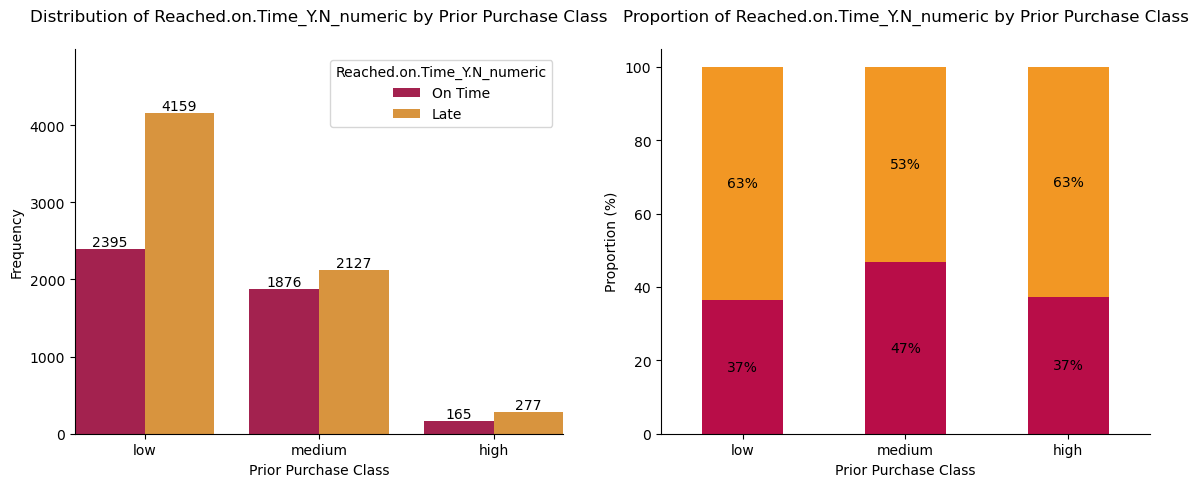

In [1459]:
plt.figure(figsize=(10, 5))

# Frequency base
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(right=1.2)
sns.despine(right=True)

# Replace Cost_class with Prior_purchase_class in the countplot
sns.countplot(ax=axes[0], x=df_commerce_copy['Prior_purchase_class'], hue=df_commerce_copy['Reached.on.Time_Y.N_numeric'].sort_values(), order=['low', 'medium', 'high'])

axes[0].bar_label(axes[0].containers[0], label_type='edge', fontweight='normal')
axes[0].bar_label(axes[0].containers[1], label_type='edge', fontweight='normal')

axes[0].set(ylabel='Frequency', xlabel='Prior Purchase Class')
axes[0].set_title('Distribution of Reached.on.Time_Y.N_numeric by Prior Purchase Class', y=1.05)
axes[0].legend(['On Time', 'Late'], loc=0, ncol=1, title='Reached.on.Time_Y.N_numeric', borderaxespad=0.8)
axes[0].margins(0, 0.2)

# Proportion base
pc = df_commerce_copy.groupby(['Prior_purchase_class', 'Reached.on.Time_Y.N_numeric'])['Reached.on.Time_Y.N_numeric'].count().reset_index(name='Freq')
pc['Prop'] = round(pc['Freq'] / pc.groupby('Prior_purchase_class')['Freq'].transform(sum) * 100, 2)
pc['Prior_purchase_class'] = pd.Categorical(pc['Prior_purchase_class'], ['low', 'medium', 'high'])
pc.sort_values('Prior_purchase_class', inplace=True)
pc.pivot_table(index='Prior_purchase_class', columns='Reached.on.Time_Y.N_numeric', values='Prop').plot(kind='bar', stacked=True, ax=axes[1])

axes[1].bar_label(axes[1].containers[0], label_type='center', fontweight='light', fmt='%.0f%%')
axes[1].bar_label(axes[1].containers[1], label_type='center', fontweight='light', fmt='%.0f%%')

axes[1].set_title('Proportion of Reached.on.Time_Y.N_numeric by Prior Purchase Class', y=1.05)
axes[1].set(ylabel='Proportion (%)', xlabel='Prior Purchase Class')
axes[1].set_xticks(ticks=axes[1].get_xticks(), labels=axes[1].get_xticklabels(), rotation=0)

axes[1].get_legend().set_visible(False)

plt.show()


Low and High prior purchases class is suffering more late deliveries than the medium prior purchase class. We can use this feature as a predictor in the model.

In [1460]:
num_cols

['Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [1461]:
num_cols.remove('Prior_purchases')

#### Checking Class Imbalance

In [1462]:
# Class imbalance check in percentage (%)
round(df_commerce_copy['Reached.on.Time_Y.N'].value_counts(normalize = True)*100, 2)

Reached.on.Time_Y.N
No     59.67
Yes    40.33
Name: proportion, dtype: float64

<div>
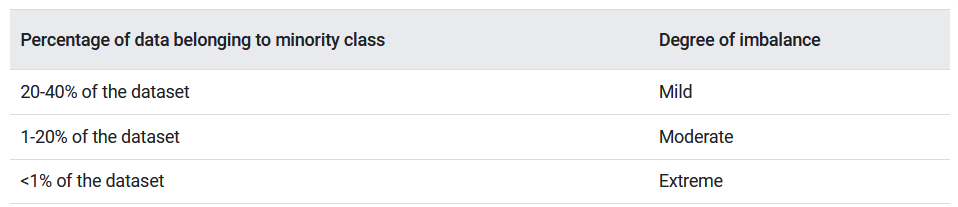
</div>

*According to this, our dataset is only very mildly imbalanced. Therefore, we do not need to introduce any balancing methods.*

### Missing Values

In [1463]:
df_commerce_copy.isnull().sum()

Warehouse_block                0
Mode_of_Shipment               0
Customer_rating                0
Cost_of_the_Product            0
Prior_purchases                0
Product_importance             0
Gender                         0
Discount_offered               0
Weight_in_gms                  0
Reached.on.Time_Y.N            0
Reached.on.Time_Y.N_numeric    0
Cost_class                     0
Prior_purchase_class           0
dtype: int64

*As seen, we have 0 missing values in any of the columns.*

### Duplicate Values

In [1464]:
df_commerce_copy[df_commerce_copy.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached.on.Time_Y.N_numeric,Cost_class,Prior_purchase_class


*There are no duplicate values in our dataset.*

## Outliers:

*We will use the IQR Method to test for outliers.\
Outliers are typically defined as values below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.*

In [1465]:
Q1 = df_commerce_copy[num_cols].quantile(0.25)
Q3 = df_commerce_copy[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df_commerce_copy[num_cols] < (Q1 - 1.5 * IQR)) | (df_commerce_copy[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Cost_of_the_Product       0
Discount_offered       2209
Weight_in_gms             0
dtype: int64

*From the above, we see that `Discount_offered` have a significant number of outliers. \
We have already sorted the `Prior_purchases` columns into classes so let us deal with `Discount_offered`. \
Let us visualize these using Box plots.*

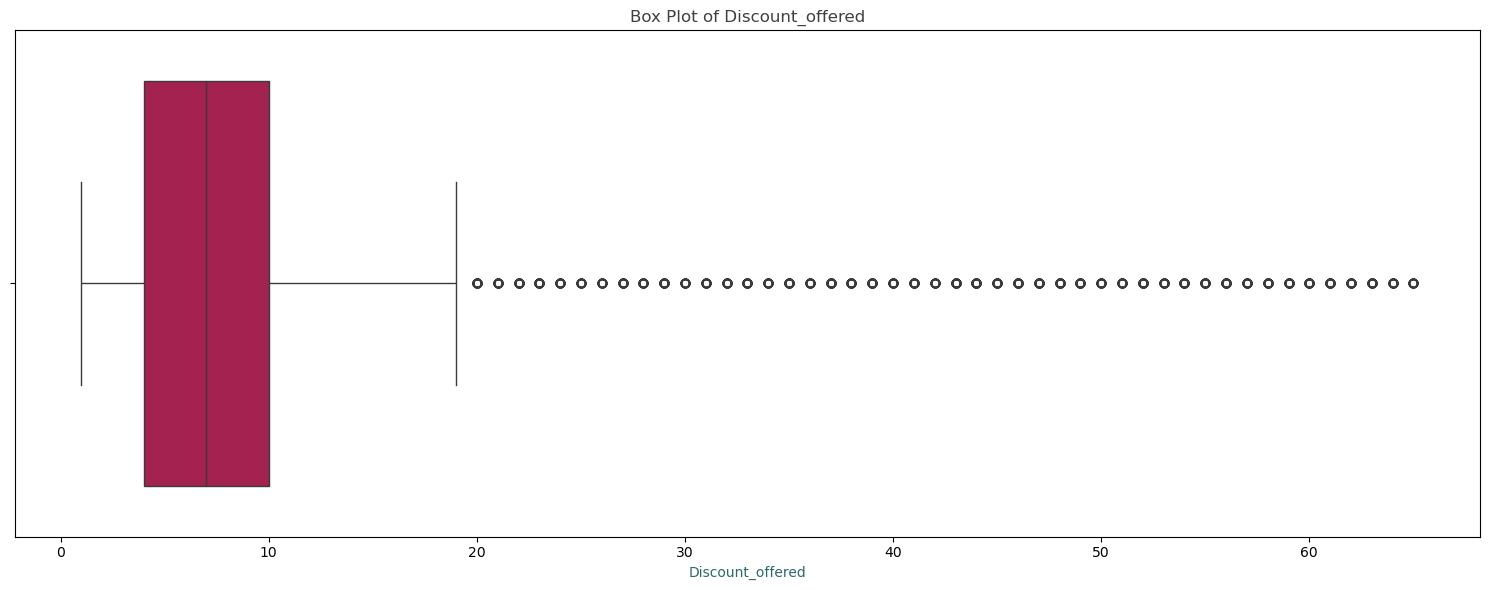

In [1466]:
outlier_cols = ['Discount_offered']

fig, axes = plt.subplots(nrows=1, ncols=len(outlier_cols), figsize=(15, 6))


if len(outlier_cols) == 1:
    axes = [axes]

# Plot each column
for ax, col in zip(axes, outlier_cols):
    sns.boxplot(x=df_commerce_copy[col], ax=ax, color=colors['plum'])
    ax.set_title(f'Box Plot of {col}', color=colors['dark_grey'])
    ax.set_xlabel(col, color=colors['dark_teal'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

*From the above plots, we can see that both the `Prior_purchases` and `Discount_offered` have outliers on the higher sides. \
Let us check the statistical information of both.*

In [1467]:
df_commerce_copy['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

*Let's check the distribution of the numerical columns.*

array([[<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Discount_offered'}>],
       [<Axes: title={'center': 'Weight_in_gms'}>, <Axes: >]],
      dtype=object)

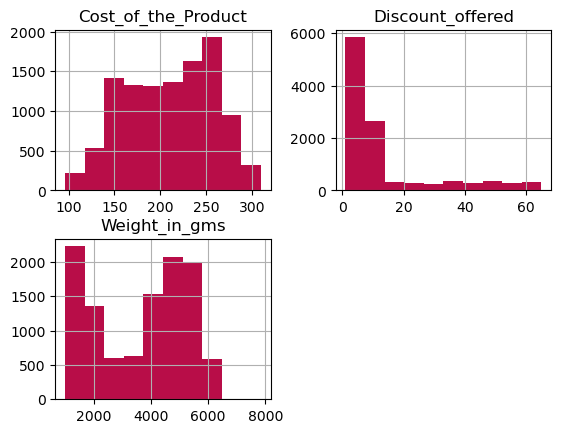

In [1468]:
df_commerce_copy[num_cols].hist()

In [1469]:
df_commerce_copy[num_cols].skew()

Cost_of_the_Product   -0.157117
Discount_offered       1.798929
Weight_in_gms         -0.249747
dtype: float64

**Cost_of_the_Product: -0.157117**
- Negative skewness: This indicates a slight left skew, meaning there are more of low cost items and less number of hight cost items though the skewness is quite mild.

**Discount_offered: 1.798929**
- Strong positive skewness: Similar to Prior_purchases, this column has a strong right skew, indicating a concentration of low values and some large outliers.

**Weight_in_gms: -0.249747**
- Negative skewness: The data is left-skewed, with a slight concentration of higher values and a a fairly large number of lower values pulling the tail to the left.

*Here, we find the `Discount_offered` column has significantly high skewness. \
For a better insights, we will split our dataset into two: one with outliers removed and the other with outliers treated, to compare the differences in the final models.*

### Outliers Removed

*First, let us remove the outliers using the IQR method.*

In [1470]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df_commerce_copy[['Discount_offered']].quantile(0.25)
Q3 = df_commerce_copy[[ 'Discount_offered']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_commerce_outliers_removed = df_commerce_copy[
    ~((df_commerce_copy[[ 'Discount_offered']] < lower_bound) |
      (df_commerce_copy[[ 'Discount_offered']] > upper_bound)).any(axis=1)
].copy()

# Check the shape of the new DataFrame to see how many rows were removed
df_commerce_outliers_removed.shape

(8790, 13)

*Now, let us treat the outliers in a new dataframe.*

### Outliers Treated

In [1471]:
df_commerce_outliers_treated = df_commerce_copy.copy()
df_commerce_outliers_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Warehouse_block              10999 non-null  object
 1   Mode_of_Shipment             10999 non-null  object
 2   Customer_rating              10999 non-null  object
 3   Cost_of_the_Product          10999 non-null  int64 
 4   Prior_purchases              10999 non-null  int64 
 5   Product_importance           10999 non-null  object
 6   Gender                       10999 non-null  object
 7   Discount_offered             10999 non-null  int64 
 8   Weight_in_gms                10999 non-null  int64 
 9   Reached.on.Time_Y.N          10999 non-null  object
 10  Reached.on.Time_Y.N_numeric  10999 non-null  int64 
 11  Cost_class                   10999 non-null  object
 12  Prior_purchase_class         10999 non-null  object
dtypes: int64(5), object(8)
memory u

*Here, we are going to try to treat the outliers using Log Tranformations.*

*Then, we will use three sets of data (outliers removed, outliers log-transformed and outliers left as is (original data), to train our models and compare.*

*First, let's do a log-transformation and then check the skewness. Log Transformation mainly improves the skewness of the data.*

In [1472]:
df_commerce_outliers_treated['Discount_offered_log'] = np.log1p(df_commerce_outliers_treated['Discount_offered'])

In [1473]:
df_commerce_outliers_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Warehouse_block              10999 non-null  object 
 1   Mode_of_Shipment             10999 non-null  object 
 2   Customer_rating              10999 non-null  object 
 3   Cost_of_the_Product          10999 non-null  int64  
 4   Prior_purchases              10999 non-null  int64  
 5   Product_importance           10999 non-null  object 
 6   Gender                       10999 non-null  object 
 7   Discount_offered             10999 non-null  int64  
 8   Weight_in_gms                10999 non-null  int64  
 9   Reached.on.Time_Y.N          10999 non-null  object 
 10  Reached.on.Time_Y.N_numeric  10999 non-null  int64  
 11  Cost_class                   10999 non-null  object 
 12  Prior_purchase_class         10999 non-null  object 
 13  Discount_offered

*Now, let's check the distributions using a histogram and the effect of the log transformation on outliers using a box plot.*

array([[<Axes: title={'center': 'Discount_offered_log'}>]], dtype=object)

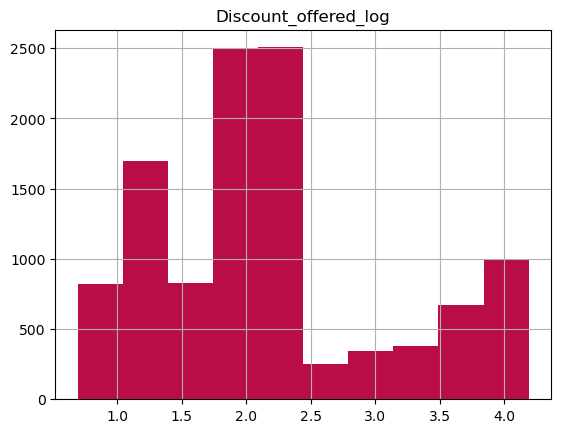

In [1474]:
df_commerce_outliers_treated[['Discount_offered_log']].hist()

In [1475]:
df_commerce_outliers_treated[['Discount_offered_log']].skew()

Discount_offered_log    0.53222
dtype: float64

- Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
- Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
- Approximately symmetric distribution: If the skewness value is between −½ and +½.


Since, our `Discount_offered_log` column has a skewnewss of about 0.53, we can say that it is approximately symmetric.

*Our treated distributions are much more symmetrical now and its skewness is decreased as noted.* \
*Now, let us check the treated distributions with all factors.*

In [1476]:
num_cols.append('Discount_offered_log')

array([[<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Discount_offered'}>],
       [<Axes: title={'center': 'Weight_in_gms'}>,
        <Axes: title={'center': 'Discount_offered_log'}>]], dtype=object)

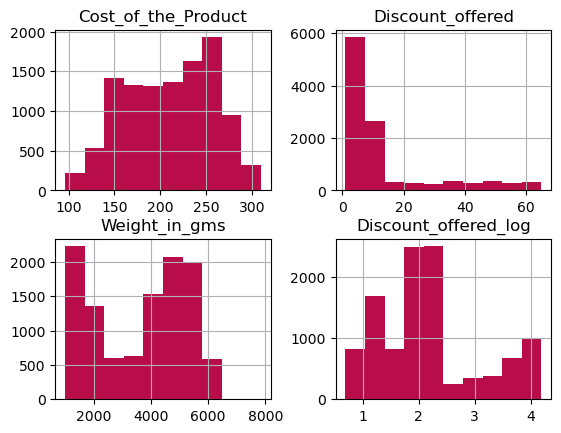

In [1477]:
df_commerce_outliers_treated[num_cols].hist()

In [1478]:
num_cols_outliers_treated = []
cat_cols_outliers_treated = []
for i in df_commerce_outliers_treated.columns:
    if (df_commerce_outliers_treated[str(i)].dtype == 'int64') | (df_commerce_outliers_treated[str(i)].dtype == 'float64'):
        num_cols_outliers_treated.append(i)
    else:
        cat_cols_outliers_treated.append(i)

In [1479]:
num_cols_outliers_treated

['Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N_numeric',
 'Discount_offered_log']

In [1480]:
cat_cols_outliers_treated

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_rating',
 'Product_importance',
 'Gender',
 'Reached.on.Time_Y.N',
 'Cost_class',
 'Prior_purchase_class']

In [1481]:
df_commerce_outliers_treated.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Reached.on.Time_Y.N_numeric', 'Cost_class', 'Prior_purchase_class',
       'Discount_offered_log'],
      dtype='object')

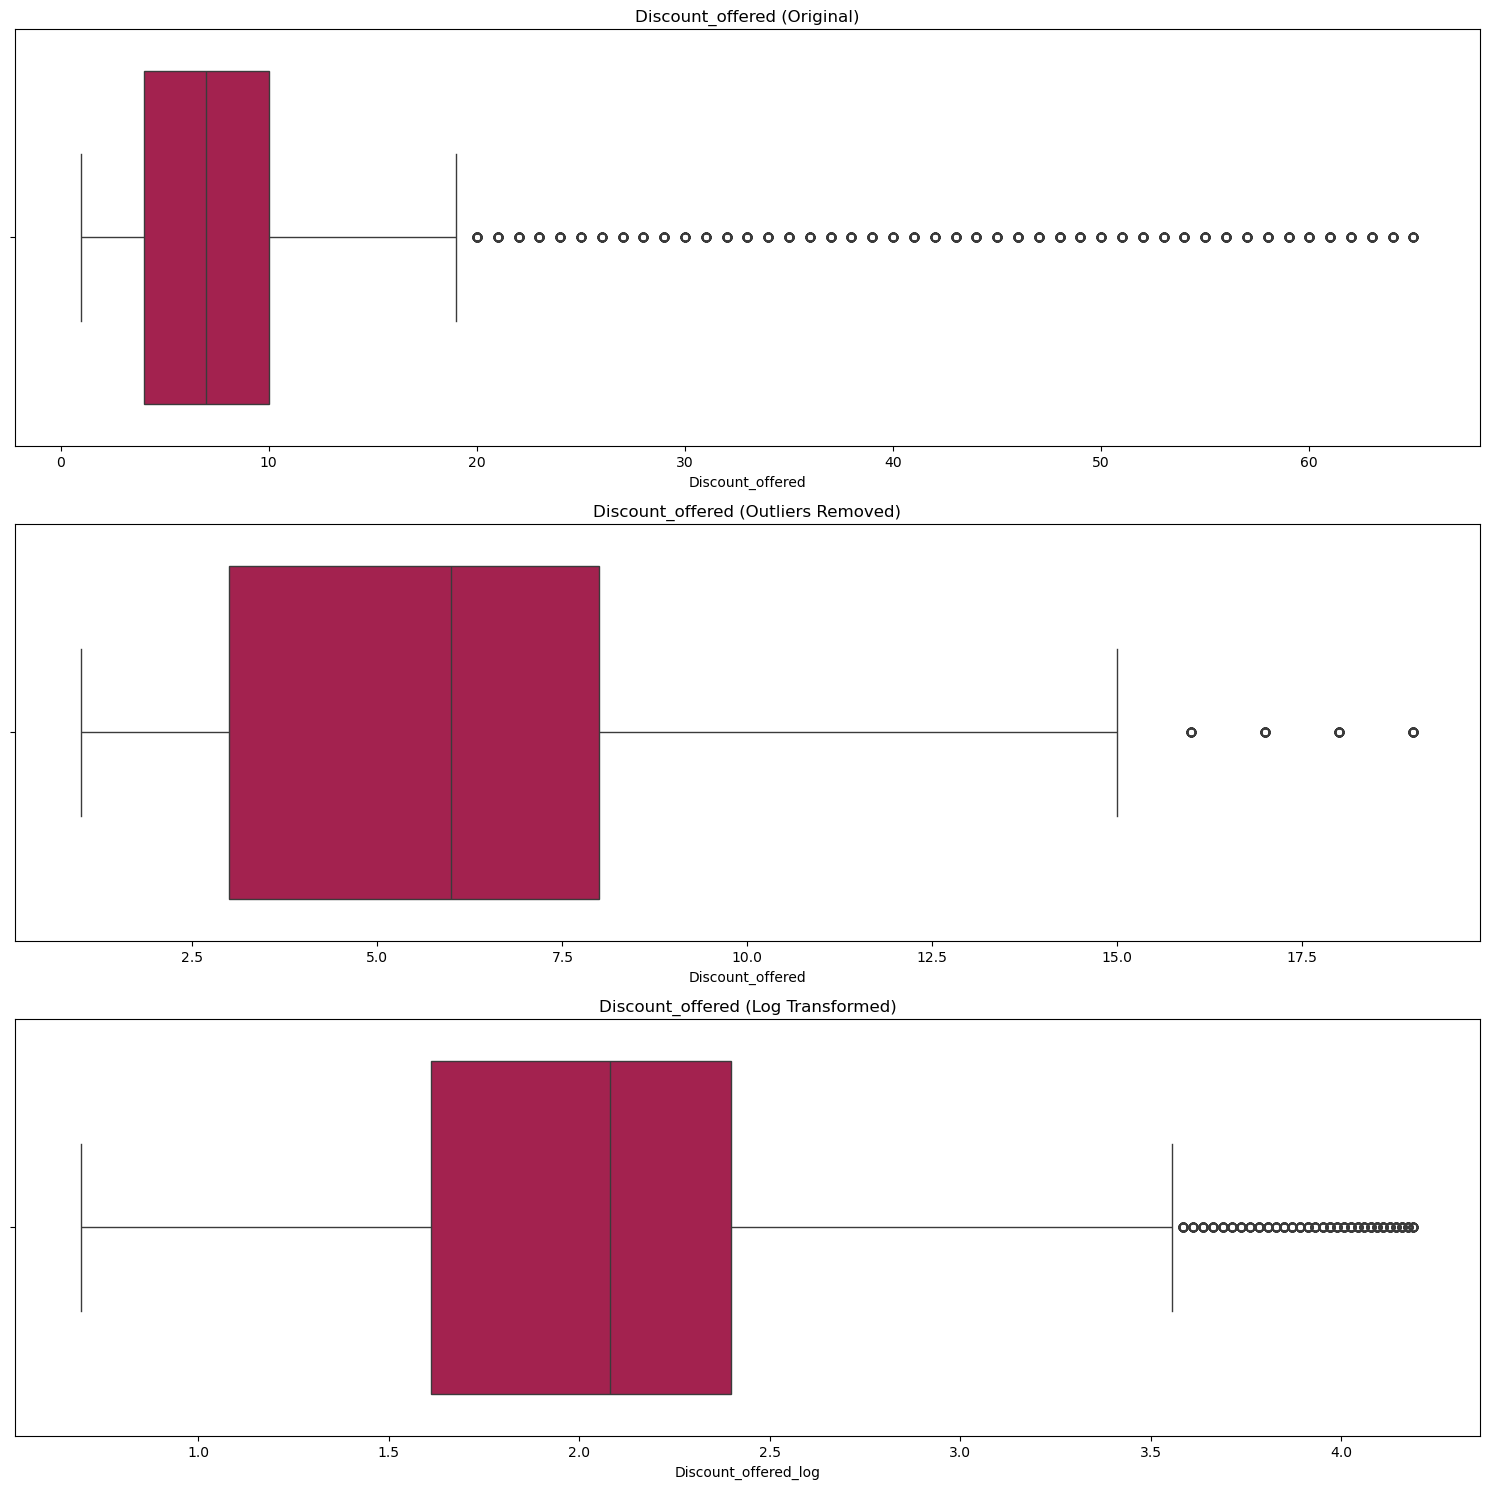

In [1482]:
# Create subplots with updated arrangement
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plot original data for Discount_offered (left side)
sns.boxplot(x=df_commerce_copy['Discount_offered'], ax=axes[0], color=colors['plum'])
axes[0].set_title('Discount_offered (Original)')

# Plot removed outliers data for Discount_offered (left side)
sns.boxplot(x=df_commerce_outliers_removed['Discount_offered'], ax=axes[1], color=colors['plum'])
axes[1].set_title('Discount_offered (Outliers Removed)')

# Plot Box-Cox transformed data for Discount_offered (left side)
sns.boxplot(x=df_commerce_outliers_treated['Discount_offered_log'], ax=axes[2], color=colors['plum'])
axes[2].set_title('Discount_offered (Log Transformed)')

# Adjust layout
plt.tight_layout()
plt.show()


*Now, we have three sets of data to train our models:*
1. Original
2. Outliers Removed
3. Outliers with Log Transformation

***

## Original/Reference Data

In [1483]:
df_ref = df_commerce_copy.copy()
df_ref.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Reached.on.Time_Y.N_numeric', 'Cost_class', 'Prior_purchase_class'],
      dtype='object')

### Encoding and Scaling

*Since, models usually perform better with numeric datatypes, we will modify our dataset.*
1. Drop the `Reached.on.Time_Y.N` columns since we already have the `Reached.on.Time_Y.N_numeric` column.
2. Drop the following columns : `Warehouse_block`, `Mode_of_Shipment`, `Customer_rating` and `Gender` since from the EDA, we saw that they do not hold importance to modelling.
3. We also drop `Cost_of_the_Product` and `Prior_purchase_class` since we have already handled these columns into classes.
4. Encode our categorical data columns with **Ordinal Encoding**. This is suitable for columns where the categories have a meaningful order (e.g., `Product_importance`, `Cost_class`, `Prior_purchase_class`)

In [1484]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Warehouse_block              10999 non-null  object
 1   Mode_of_Shipment             10999 non-null  object
 2   Customer_rating              10999 non-null  object
 3   Cost_of_the_Product          10999 non-null  int64 
 4   Prior_purchases              10999 non-null  int64 
 5   Product_importance           10999 non-null  object
 6   Gender                       10999 non-null  object
 7   Discount_offered             10999 non-null  int64 
 8   Weight_in_gms                10999 non-null  int64 
 9   Reached.on.Time_Y.N          10999 non-null  object
 10  Reached.on.Time_Y.N_numeric  10999 non-null  int64 
 11  Cost_class                   10999 non-null  object
 12  Prior_purchase_class         10999 non-null  object
dtypes: int64(5), object(8)
memory u

In [1485]:
df_ref.drop(['Reached.on.Time_Y.N', 'Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Customer_rating'], axis=1, inplace=True)

In [1486]:
df_ref.drop(['Cost_of_the_Product','Prior_purchases'], axis=1, inplace=True)

In [1487]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Product_importance           10999 non-null  object
 1   Discount_offered             10999 non-null  int64 
 2   Weight_in_gms                10999 non-null  int64 
 3   Reached.on.Time_Y.N_numeric  10999 non-null  int64 
 4   Cost_class                   10999 non-null  object
 5   Prior_purchase_class         10999 non-null  object
dtypes: int64(3), object(3)
memory usage: 515.7+ KB


In [1488]:
num_cols_ref= []
cat_cols_ref = []
for i in df_ref.columns:
    if (df_ref[str(i)].dtype == 'int64') | (df_ref[str(i)].dtype == 'float64'):
        num_cols_ref.append(i)
    else:
        cat_cols_ref.append(i)

In [1489]:
cat_cols_ref

['Product_importance', 'Cost_class', 'Prior_purchase_class']

In [1490]:
df_ref_encoded = pd.get_dummies(df_ref, columns=cat_cols_ref, drop_first=True)

In [1491]:
df_ref_encoded.columns

Index(['Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N_numeric',
       'Product_importance_low', 'Product_importance_medium', 'Cost_class_low',
       'Cost_class_medium', 'Prior_purchase_class_low',
       'Prior_purchase_class_medium'],
      dtype='object')

*Now, we have encoded our data. So let us move onto splitting out dataset into X and y (Target variable).*

In [1492]:
X = df_ref_encoded.drop('Reached.on.Time_Y.N_numeric', axis=1)
y = df_ref_encoded['Reached.on.Time_Y.N_numeric']

In [1493]:
class_percentage = y.value_counts(normalize=True) * 100
print("\nClass distribution in percentage:")
print(class_percentage)


Class distribution in percentage:
Reached.on.Time_Y.N_numeric
1    59.669061
0    40.330939
Name: proportion, dtype: float64


*Now, we can see there is a slight class imbalance. However this is very mild, therefore there is no need to handle it.*

*Let's split our dataset into training and testing data.*

In [1495]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled data
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (8799, 8)
Scaled testing set shape: (2200, 8)


In [1496]:
X.columns

Index(['Discount_offered', 'Weight_in_gms', 'Product_importance_low',
       'Product_importance_medium', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

#### Defining Functions for Modelling

In [1497]:
# Function to hyper-tune models with F1 score as the main criterion
def hypertune_model_f1(model, param_grid, X_train, y_train, X_test, y_test, search_type='grid', n_splits=3, n_iter=10, scoring='f1_macro'):
    """
    Hyper-tunes the given model using GridSearchCV or RandomizedSearchCV, with F1 score as the main criterion.
    
    Parameters:
    - model: A classification model (e.g., RandomForestClassifier())
    - param_grid: A dictionary containing hyperparameters to tune
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - search_type: 'grid' for GridSearchCV, 'random' for RandomizedSearchCV (default: 'grid')
    - n_splits: Number of cross-validation folds (default: 3)
    - n_iter: Number of iterations for RandomizedSearchCV (default: 10, only applicable for random search)
    - scoring: The metric to optimize, default is 'f1_macro' for multi-class classification.
    
    Returns:
    - best_model: The best model based on F1 score
    - results: A dictionary with classification report, confusion matrix, accuracy, and F1 score
    """
    # Define the cross-validation strategy
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    if search_type == 'grid':
        search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring=scoring)
    elif search_type == 'random':
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=cv, n_jobs=-1, verbose=2, scoring=scoring)
    else:
        raise ValueError("search_type must be either 'grid' or 'random'")
    
    # Fit the search object to the training data
    search.fit(X_train, y_train)
    
    # Get the best estimator based on F1 score
    best_model = search.best_estimator_
    
    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Evaluation metrics
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # You can change 'macro' to 'binary' for binary classification
    
    # Print results
    print(f"Best parameters found for {type(model).__name__}: {search.best_params_}\n")
    print(f"Confusion Matrix:\n{confusion}\n")
    print(f"Classification Report:\n{report}\n")
    print(f"Accuracy: {accuracy:.4f}\n")
    print(f"F1 Score: {f1:.4f}\n")
    
    # Return the best model and the evaluation results
    results = {
        'confusion_matrix': confusion,
        'classification_report': report,
        'accuracy': accuracy,
        'f1_score': f1
    }
    
    return best_model, results


In [1498]:
def evaluate_model_performance(y_test, y_pred, model_name, average='macro'):
    """
    Evaluates model performance and returns detailed metrics in a DataFrame.
    
    Parameters:
    - y_test: Actual labels
    - y_pred: Predicted labels
    - model_name: Name of the model being evaluated (for comparison)
    - average: Averaging method for multi-class classification (default: 'macro')
    
    Returns:
    - df_results: DataFrame containing model name, accuracy, F1 score, precision, and recall
    """
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average=average)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)

    print(f"Confusion Matrix for {model_name}:\n{confusion}\n")
    print(f"Classification Report for {model_name}:\n{report}\n")
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"F1 Score for {model_name}: {f1:.4f}")
    print(f"Precision for {model_name}: {precision:.4f}")
    print(f"Recall for {model_name}: {recall:.4f}\n")

    # Create a DataFrame to store the results
    df_results = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'F1 Score': [f1],
        'Precision': [precision],
        'Recall': [recall],
        'Confusion_Matrix': [confusion]
    })
    
    return df_results


In [1499]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, title='Confusion Matrix'):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Delivered', 'Delivered'], 
                yticklabels=['Not Delivered', 'Delivered'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
    

#### Baseline F1 Score

In [1500]:
# For imbalanced dataset example
baseline_model = DummyClassifier(strategy='uniform', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_f1score = f1_score(y_test, y_pred_baseline)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline F1 Score:", baseline_f1score)
print("Baseline Accuracy:", baseline_accuracy)

Baseline F1 Score: 0.5461409395973155
Baseline Accuracy: 0.5081818181818182


*In order to improve the baseline F1 score and accuracy, we use Random Forest, Decision Tree, Logistic Regression and K-Nearest Neighbours.*

### Random Forest Modelling

In [1501]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

best_rf, rf_results = hypertune_model_f1(
    RandomForestClassifier(random_state=42), 
    param_grid_rf, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found for RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
[[709 186]
 [539 766]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       895
           1       0.80      0.59      0.68      1305

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200


Accuracy: 0.6705

F1 Score: 0.6702



In [1503]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_eval_results = evaluate_model_performance(y_test, y_pred_rf, model_name='Random Forest')
#all_results.append(rf_results)

Confusion Matrix for Random Forest:
[[709 186]
 [539 766]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       895
           1       0.80      0.59      0.68      1305

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200


Accuracy for Random Forest: 0.6705
F1 Score for Random Forest: 0.6702
Precision for Random Forest: 0.6864
Recall for Random Forest: 0.6896



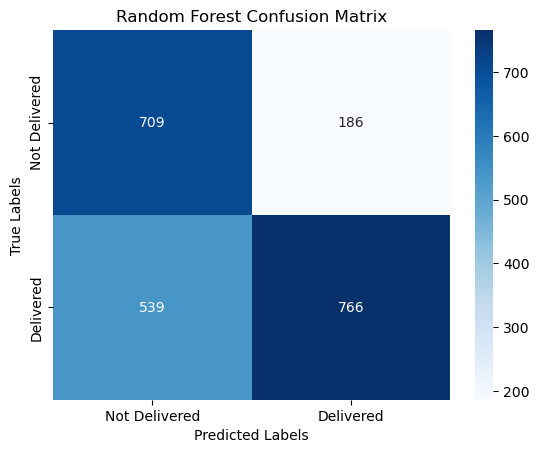

In [1504]:
plot_confusion_matrix(rf_eval_results['Confusion_Matrix'].values[0], title='Random Forest Confusion Matrix')

*We are only concerned with late deliveries that are predicted on time, which can make customers unhappy and less trusting of our company. Here, the number of deliveries that are predicted late but actually are on time are 539 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 186.*


### Decision Tree Modelling

In [1505]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

best_dt, dt_results = hypertune_model_f1(
    DecisionTreeClassifier(random_state=42), 
    param_grid_dt, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[846  49]
 [643 662]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.78      0.69      0.68      2200


Accuracy: 0.6855

F1 Score: 0.6832



In [1506]:
y_pred_dt = best_dt.predict(X_test_scaled)
dt_eval_results = evaluate_model_performance(y_test, y_pred_dt, model_name='Decision Tree')
#all_results.append(rf_results)

Confusion Matrix for Decision Tree:
[[846  49]
 [643 662]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.78      0.69      0.68      2200


Accuracy for Decision Tree: 0.6855
F1 Score for Decision Tree: 0.6832
Precision for Decision Tree: 0.7496
Recall for Decision Tree: 0.7263



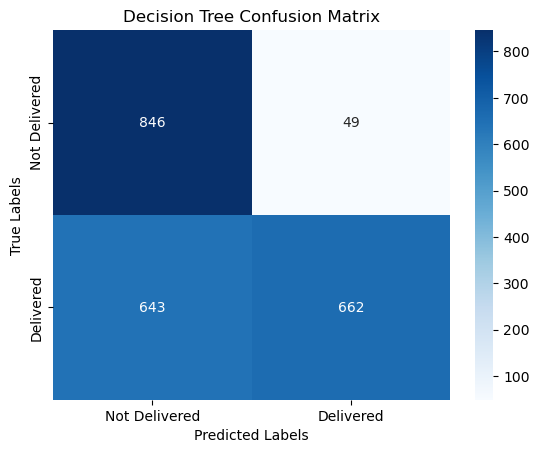

In [1507]:
plot_confusion_matrix(dt_eval_results['Confusion_Matrix'].values[0], title='Decision Tree Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 643 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 49. This value is better than our Random Forest value.*

### Logistic Regression

In [1508]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
best_lr, lr_results = hypertune_model_f1(
    LogisticRegression(), 
    param_grid_lr, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found for LogisticRegression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
[[523 372]
 [399 906]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       895
           1       0.71      0.69      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


Accuracy: 0.6495

F1 Score: 0.6386



In [1509]:
y_pred_lr = best_lr.predict(X_test_scaled)
lr_eval_results = evaluate_model_performance(y_test, y_pred_lr, model_name='Logisitc Regression')
#all_results.append(rf_results)

Confusion Matrix for Logisitc Regression:
[[523 372]
 [399 906]]

Classification Report for Logisitc Regression:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       895
           1       0.71      0.69      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


Accuracy for Logisitc Regression: 0.6495
F1 Score for Logisitc Regression: 0.6386
Precision for Logisitc Regression: 0.6381
Recall for Logisitc Regression: 0.6393



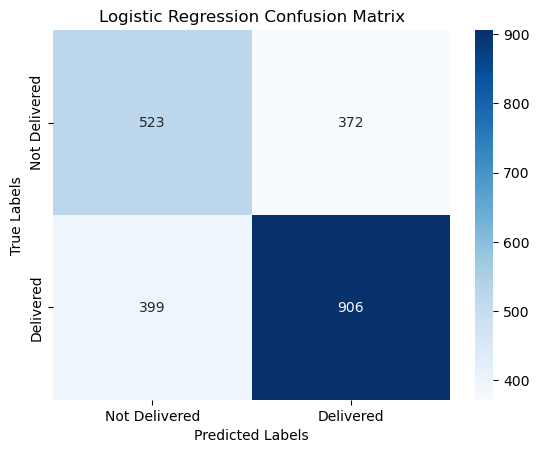

In [1510]:
plot_confusion_matrix(lr_eval_results['Confusion_Matrix'].values[0], title='Logistic Regression Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 399 which is a lot lower than our previous models. However, the deliveries predicted on-time but are late are 372, which is much higher than our RF and DT models.*

### K-Nearest Neighbours

In [1511]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}
best_knn, knn_results = hypertune_model_f1(
    KNeighborsClassifier(), 
    param_grid_knn, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix:
[[563 332]
 [463 842]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       895
           1       0.72      0.65      0.68      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200


Accuracy: 0.6386

F1 Score: 0.6327



In [1512]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_eval_results = evaluate_model_performance(y_test, y_pred_knn, model_name='K-Nearest Neighbours')
#all_results.append(rf_results)

Confusion Matrix for K-Nearest Neighbours:
[[563 332]
 [463 842]]

Classification Report for K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       895
           1       0.72      0.65      0.68      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200


Accuracy for K-Nearest Neighbours: 0.6386
F1 Score for K-Nearest Neighbours: 0.6327
Precision for K-Nearest Neighbours: 0.6330
Recall for K-Nearest Neighbours: 0.6371



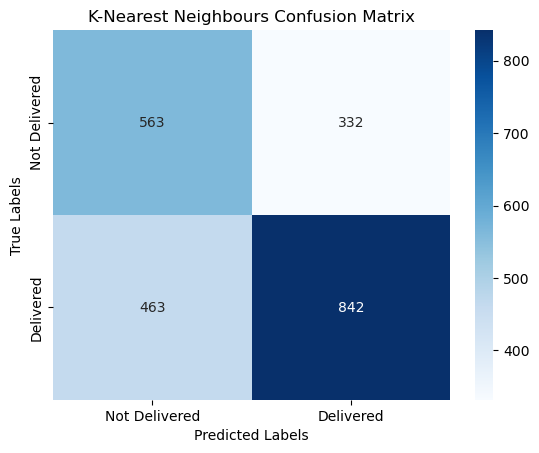

In [1513]:
plot_confusion_matrix(knn_eval_results['Confusion_Matrix'].values[0], title='K-Nearest Neighbours Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 463 which is better compared to Logistic Regression model. The deliveries predicted on-time but are late are 332, which is slightly higher than our LR model.*

### Comparing models - Original Data

In [1514]:
all_results_ref = []

# Append each model's results
all_results_ref.append(rf_eval_results)
all_results_ref.append(dt_eval_results)
all_results_ref.append(lr_eval_results)
all_results_ref.append(knn_eval_results)

# Concatenate all DataFrames into a single DataFrame
df_all_results_ref = pd.concat(all_results_ref, ignore_index=True)

In [1515]:
df_all_results_ref

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.670455,0.670233,0.686365,0.689576,"[[709, 186], [539, 766]]"
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]"
2,Logisitc Regression,0.649545,0.638592,0.638083,0.639305,"[[523, 372], [399, 906]]"
3,K-Nearest Neighbours,0.638636,0.632730,0.632970,0.637131,"[[563, 332], [463, 842]]"


C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\2230304948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_ref, palette='flare_r')
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\2230304948.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_ref, palette='flare_r')


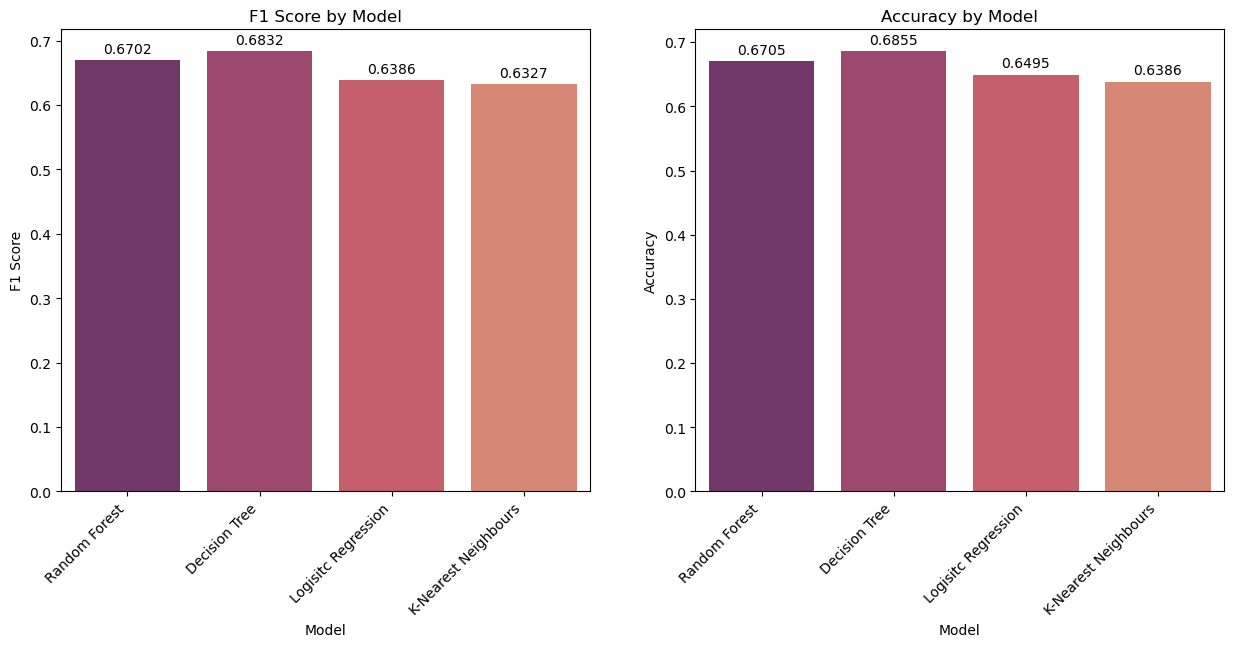

In [1516]:
# Plot F1 Score
plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_ref, palette='flare_r')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Plot Accuracy
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_ref, palette='flare_r')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

#plt.tight_layout()
plt.show()

## Outliers Handled - Log-Transformed Data

In [1517]:
df_commerce_outliers_treated.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Reached.on.Time_Y.N_numeric', 'Cost_class', 'Prior_purchase_class',
       'Discount_offered_log'],
      dtype='object')

*Here, let us rename this into df_log for interpretability.*

In [1518]:
df_log = df_commerce_outliers_treated.copy()
df_log.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Reached.on.Time_Y.N_numeric', 'Cost_class', 'Prior_purchase_class',
       'Discount_offered_log'],
      dtype='object')

*Now, we will follow the same process, ie., encoding, scaling and so, to get our final results of classification.*

In [1519]:
df_log.drop(['Reached.on.Time_Y.N', 'Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Customer_rating'], axis=1, inplace=True)

In [1520]:
df_log.drop(['Cost_of_the_Product','Prior_purchases'], axis=1, inplace=True)

In [1521]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Product_importance           10999 non-null  object 
 1   Discount_offered             10999 non-null  int64  
 2   Weight_in_gms                10999 non-null  int64  
 3   Reached.on.Time_Y.N_numeric  10999 non-null  int64  
 4   Cost_class                   10999 non-null  object 
 5   Prior_purchase_class         10999 non-null  object 
 6   Discount_offered_log         10999 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 601.6+ KB


*Since we have already log-transformed our `Discount_offered` column into the `Discount_offered_log` column, let us drop the original `Discount_offered` column.*

In [1522]:
df_log.drop('Discount_offered', axis=1, inplace=True)

In [1523]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Product_importance           10999 non-null  object 
 1   Weight_in_gms                10999 non-null  int64  
 2   Reached.on.Time_Y.N_numeric  10999 non-null  int64  
 3   Cost_class                   10999 non-null  object 
 4   Prior_purchase_class         10999 non-null  object 
 5   Discount_offered_log         10999 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 515.7+ KB


In [1524]:
# Perform one-hot encoding
df_log_encoded = pd.get_dummies(df_log, columns=['Product_importance','Cost_class','Prior_purchase_class'], drop_first=True)

In [1526]:
df_log_encoded.columns

Index(['Weight_in_gms', 'Reached.on.Time_Y.N_numeric', 'Discount_offered_log',
       'Product_importance_low', 'Product_importance_medium', 'Cost_class_low',
       'Cost_class_medium', 'Prior_purchase_class_low',
       'Prior_purchase_class_medium'],
      dtype='object')

*Now, we have encoded our data. So let us move onto splitting out dataset into X and y(Target variable).*

In [1527]:
X = df_log_encoded.drop('Reached.on.Time_Y.N_numeric', axis=1)
y = df_log_encoded['Reached.on.Time_Y.N_numeric']

In [1528]:
X.columns

Index(['Weight_in_gms', 'Discount_offered_log', 'Product_importance_low',
       'Product_importance_medium', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

#### Encoding and Scaling

In [1529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 8)
(2200, 8)
(8799,)
(2200,)


In [1530]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled data
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (8799, 8)
Scaled testing set shape: (2200, 8)


#### Baseline F1 Score and Accuracy

In [1531]:
# For imbalanced dataset example
baseline_model = DummyClassifier(strategy='uniform', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_f1score = f1_score(y_test, y_pred_baseline)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline F1 Score:", baseline_f1score)
print("Baseline Accuracy:", baseline_accuracy)

Baseline F1 Score: 0.5461409395973155
Baseline Accuracy: 0.5081818181818182


#### Random Forest Modelling - Log Transformed

In [1532]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

best_rf, rf_results = hypertune_model_f1(
    RandomForestClassifier(random_state=42), 
    param_grid_rf, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best parameters found for RandomForestClassifier: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Confusion Matrix:
[[803  92]
 [595 710]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       895
           1       0.89      0.54      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.68      2200


Accuracy: 0.6877

F1 Score: 0.6872



In [1533]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_eval_results = evaluate_model_performance(y_test, y_pred_rf, model_name='Random Forest')
#all_results.append(rf_results)

Confusion Matrix for Random Forest:
[[803  92]
 [595 710]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       895
           1       0.89      0.54      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.68      2200


Accuracy for Random Forest: 0.6877
F1 Score for Random Forest: 0.6872
Precision for Random Forest: 0.7298
Recall for Random Forest: 0.7206



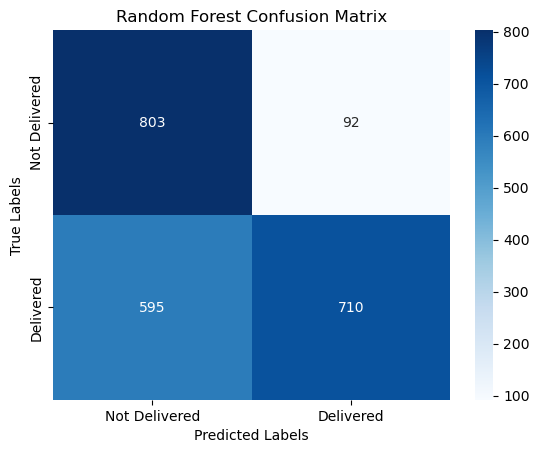

In [1534]:
plot_confusion_matrix(rf_eval_results['Confusion_Matrix'].values[0], title='Random Forest Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 595 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 92. This is much better than our previous modelled Random Forest Model.*


#### Decision Tree Modelling - Log Transformed

In [1535]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

best_dt, dt_results = hypertune_model_f1(
    DecisionTreeClassifier(random_state=42), 
    param_grid_dt, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[846  49]
 [643 662]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.78      0.69      0.68      2200


Accuracy: 0.6855

F1 Score: 0.6832



In [1536]:
y_pred_dt = best_dt.predict(X_test_scaled)
dt_eval_results = evaluate_model_performance(y_test, y_pred_dt, model_name='Decision Tree')
#all_results.append(rf_results)

Confusion Matrix for Decision Tree:
[[846  49]
 [643 662]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.68      2200
weighted avg       0.78      0.69      0.68      2200


Accuracy for Decision Tree: 0.6855
F1 Score for Decision Tree: 0.6832
Precision for Decision Tree: 0.7496
Recall for Decision Tree: 0.7263



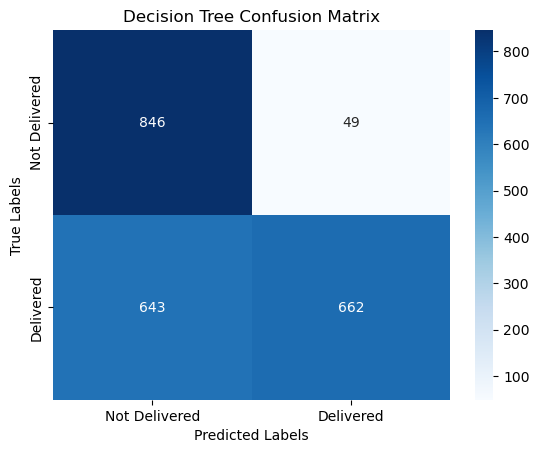

In [1537]:
plot_confusion_matrix(dt_eval_results['Confusion_Matrix'].values[0], title='Decision Tree Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 643 which is slightly higher than RF, regardless, the shipment is on-time. The deliveries predicted on-time but are late are 49. This value is better than our Random Forest value.*

#### Logistic Regression - Log Transformed

In [1538]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
best_lr, lr_results = hypertune_model_f1(
    LogisticRegression(random_state=42), 
    param_grid_lr, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found for LogisticRegression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
[[618 277]
 [543 762]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       895
           1       0.73      0.58      0.65      1305

    accuracy                           0.63      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.63      0.63      2200


Accuracy: 0.6273

F1 Score: 0.6257



In [1539]:
y_pred_lr = best_lr.predict(X_test_scaled)
lr_eval_results = evaluate_model_performance(y_test, y_pred_lr, model_name='Logisitc Regression')
#all_results.append(rf_results)

Confusion Matrix for Logisitc Regression:
[[618 277]
 [543 762]]

Classification Report for Logisitc Regression:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       895
           1       0.73      0.58      0.65      1305

    accuracy                           0.63      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.63      0.63      2200


Accuracy for Logisitc Regression: 0.6273
F1 Score for Logisitc Regression: 0.6257
Precision for Logisitc Regression: 0.6328
Recall for Logisitc Regression: 0.6372



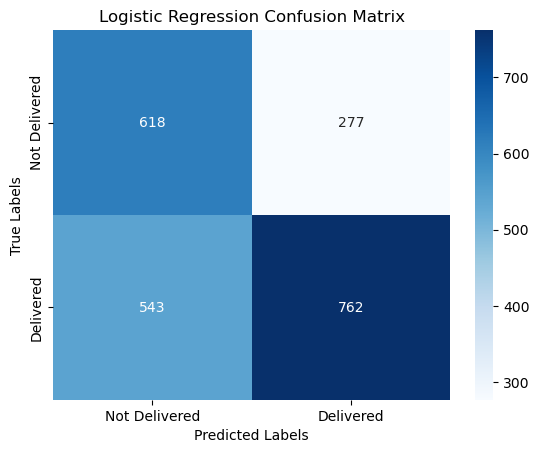

In [1540]:
plot_confusion_matrix(lr_eval_results['Confusion_Matrix'].values[0], title='Logistic Regression Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 543 which is better than our DT model. However, the deliveries predicted on-time but are late are 277, which is much higher than our RF and DT models.*

#### K-Nearest Neighbours - Log Transformed

In [1541]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}
best_knn, knn_results = hypertune_model_f1(
    KNeighborsClassifier(), 
    param_grid_knn, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix:
[[557 338]
 [463 842]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       895
           1       0.71      0.65      0.68      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200


Accuracy: 0.6359

F1 Score: 0.6297



In [1542]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_eval_results = evaluate_model_performance(y_test, y_pred_knn, model_name='K-Nearest Neighbours')
#all_results.append(rf_results)

Confusion Matrix for K-Nearest Neighbours:
[[557 338]
 [463 842]]

Classification Report for K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       895
           1       0.71      0.65      0.68      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200


Accuracy for K-Nearest Neighbours: 0.6359
F1 Score for K-Nearest Neighbours: 0.6297
Precision for K-Nearest Neighbours: 0.6298
Recall for K-Nearest Neighbours: 0.6338



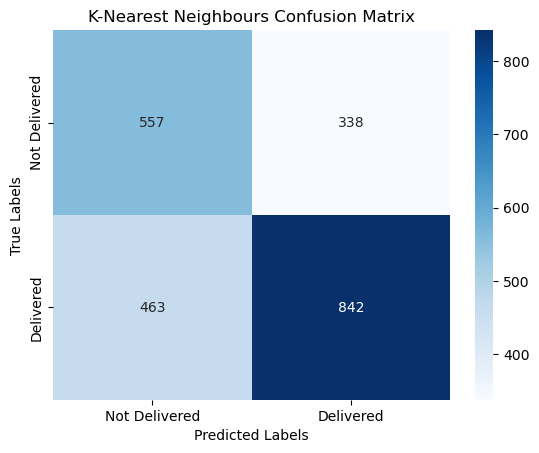

In [1543]:
plot_confusion_matrix(knn_eval_results['Confusion_Matrix'].values[0], title='K-Nearest Neighbours Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 463 which is better compared to Logistic Regression model. The deliveries predicted on-time but are late are 338, which is slightly higher than our LR model.*

### Comparing Models - Log Transformed Data

In [1544]:
all_results_log = []

# Append each model's results
all_results_log.append(rf_eval_results)
all_results_log.append(dt_eval_results)
all_results_log.append(lr_eval_results)
all_results_log.append(knn_eval_results)

# Concatenate all DataFrames into a single DataFrame
df_all_results_log = pd.concat(all_results_log, ignore_index=True)

In [1545]:
df_all_results_log

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.687727,0.687168,0.729839,0.720634,"[[803, 92], [595, 710]]"
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]"
2,Logisitc Regression,0.627273,0.625669,0.632849,0.637205,"[[618, 277], [543, 762]]"
3,K-Nearest Neighbours,0.635909,0.629695,0.629819,0.633779,"[[557, 338], [463, 842]]"


C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3696805905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_log, palette='flare_r')
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3696805905.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_log, palette='flare_r')


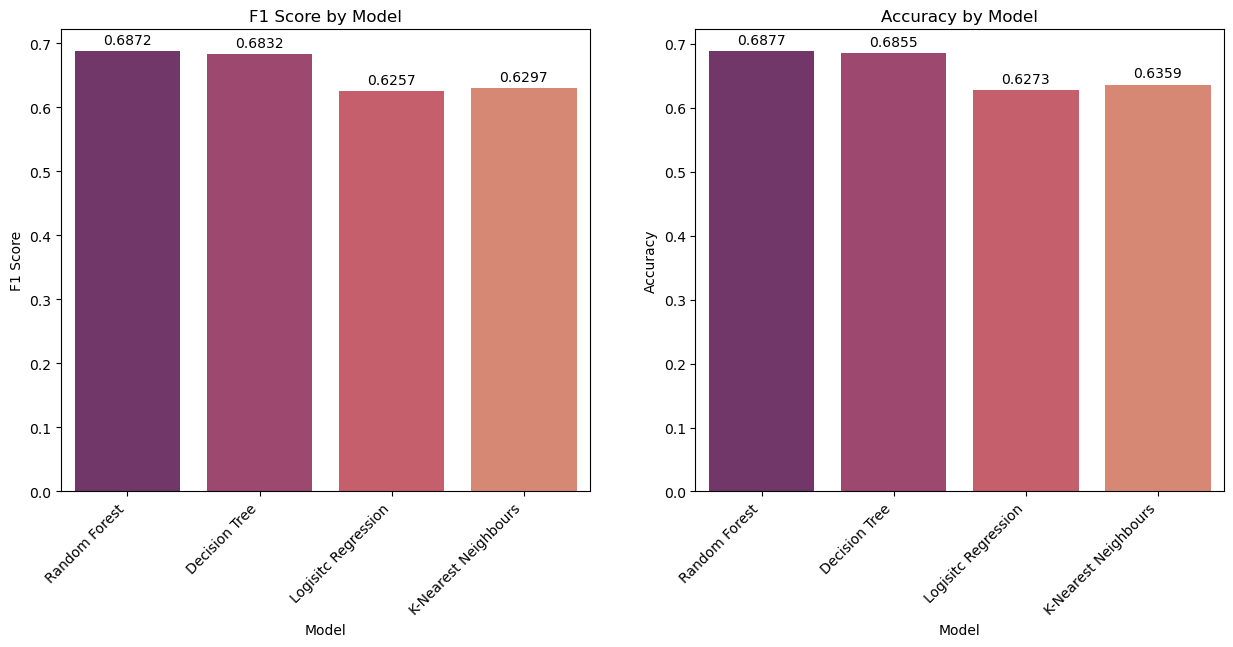

In [1546]:
# Plot F1 Score
plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_log, palette='flare_r')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Plot Accuracy
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_log, palette='flare_r')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

#plt.tight_layout()
plt.show()

## Outliers - Removed

### Encoding and Scaling

In [1547]:
df_commerce_outliers_removed.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Reached.on.Time_Y.N_numeric', 'Cost_class', 'Prior_purchase_class'],
      dtype='object')

In [1548]:
df_commerce_outliers_removed.shape

(8790, 13)

In [1549]:
df_commerce_outliers_removed.drop(['Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Customer_rating','Reached.on.Time_Y.N'], axis=1, inplace=True)

In [1550]:
df_commerce_outliers_removed.drop(['Cost_of_the_Product','Prior_purchases'], axis=1, inplace=True)

In [1551]:
df_commerce_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 3 to 10998
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Product_importance           8790 non-null   object
 1   Discount_offered             8790 non-null   int64 
 2   Weight_in_gms                8790 non-null   int64 
 3   Reached.on.Time_Y.N_numeric  8790 non-null   int64 
 4   Cost_class                   8790 non-null   object
 5   Prior_purchase_class         8790 non-null   object
dtypes: int64(3), object(3)
memory usage: 480.7+ KB


In [1552]:
# Perform one-hot encoding
df_commerce_outliers_removed_encoded = pd.get_dummies(df_commerce_outliers_removed, 
                                                      columns=['Product_importance','Cost_class','Prior_purchase_class'], drop_first=True)

In [1553]:
df_commerce_outliers_removed_encoded.columns

Index(['Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N_numeric',
       'Product_importance_low', 'Product_importance_medium', 'Cost_class_low',
       'Cost_class_medium', 'Prior_purchase_class_low',
       'Prior_purchase_class_medium'],
      dtype='object')

*Now, we have encoded our data. So let us move onto splitting out dataset into X and y(Target variable).*

In [1554]:
X = df_commerce_outliers_removed_encoded.drop(['Reached.on.Time_Y.N_numeric'], axis=1)
y = df_commerce_outliers_removed_encoded['Reached.on.Time_Y.N_numeric']
X.columns

Index(['Discount_offered', 'Weight_in_gms', 'Product_importance_low',
       'Product_importance_medium', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

*Let's split our dataset into training and testing data.*

In [1557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7032, 8)
(1758, 8)
(7032,)
(1758,)


In [1558]:
X.columns

Index(['Discount_offered', 'Weight_in_gms', 'Product_importance_low',
       'Product_importance_medium', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

In [1559]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled data
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (7032, 8)
Scaled testing set shape: (1758, 8)


### Baseline F1 Score and Accuracy

In [1560]:
# For imbalanced dataset example
baseline_model = DummyClassifier(strategy='uniform', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_f1score = f1_score(y_test, y_pred_baseline)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline F1 Score:", baseline_f1score)
print("Baseline Accuracy:", baseline_accuracy)

Baseline F1 Score: 0.5055072463768115
Baseline Accuracy: 0.5147895335608647


### Random Forest Modelling - Outliers Removed

In [1561]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

best_rf, rf_results = hypertune_model_f1(
    RandomForestClassifier(random_state=42), 
    param_grid_rf, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best parameters found for RandomForestClassifier: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}

Confusion Matrix:
[[672 230]
 [480 376]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       902
           1       0.62      0.44      0.51       856

    accuracy                           0.60      1758
   macro avg       0.60      0.59      0.58      1758
weighted avg       0.60      0.60      0.59      1758


Accuracy: 0.5961

F1 Score: 0.5843



In [1562]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_eval_results = evaluate_model_performance(y_test, y_pred_rf, model_name='Random Forest')
#all_results.append(rf_results)

Confusion Matrix for Random Forest:
[[672 230]
 [480 376]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       902
           1       0.62      0.44      0.51       856

    accuracy                           0.60      1758
   macro avg       0.60      0.59      0.58      1758
weighted avg       0.60      0.60      0.59      1758


Accuracy for Random Forest: 0.5961
F1 Score for Random Forest: 0.5843
Precision for Random Forest: 0.6019
Recall for Random Forest: 0.5921



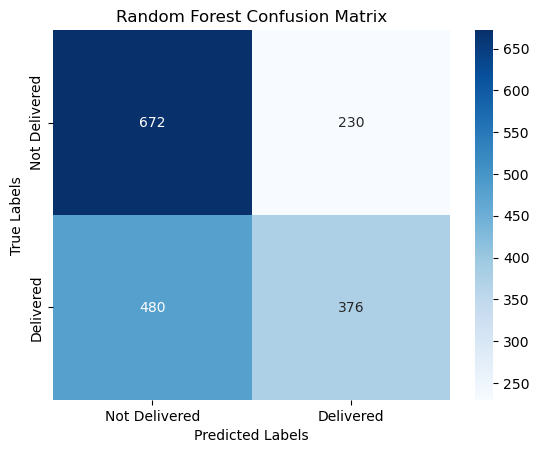

In [1563]:
plot_confusion_matrix(rf_eval_results['Confusion_Matrix'].values[0], title='Random Forest Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 480. The deliveries predicted on-time but are late are 230, which is higher than our previous Random Forest Models.*

### Decision Tree Modelling - Outliers Removed

In [1564]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

best_dt, dt_results = hypertune_model_f1(
    DecisionTreeClassifier(random_state=42), 
    param_grid_dt, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[656 246]
 [461 395]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       902
           1       0.62      0.46      0.53       856

    accuracy                           0.60      1758
   macro avg       0.60      0.59      0.59      1758
weighted avg       0.60      0.60      0.59      1758


Accuracy: 0.5978

F1 Score: 0.5888



In [1565]:
y_pred_dt = best_dt.predict(X_test_scaled)
dt_eval_results = evaluate_model_performance(y_test, y_pred_dt, model_name='Decision Tree')
#all_results.append(rf_results)

Confusion Matrix for Decision Tree:
[[656 246]
 [461 395]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       902
           1       0.62      0.46      0.53       856

    accuracy                           0.60      1758
   macro avg       0.60      0.59      0.59      1758
weighted avg       0.60      0.60      0.59      1758


Accuracy for Decision Tree: 0.5978
F1 Score for Decision Tree: 0.5888
Precision for Decision Tree: 0.6018
Recall for Decision Tree: 0.5944



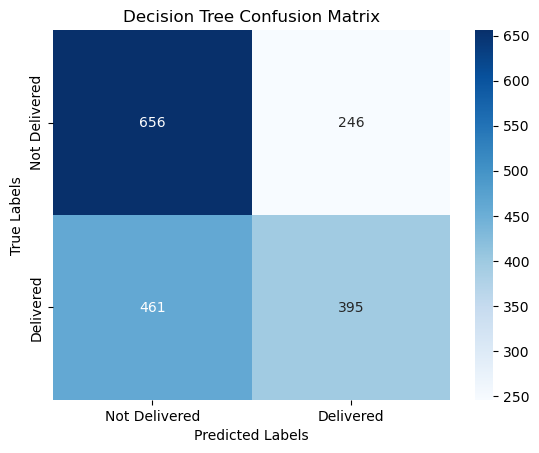

In [1566]:
plot_confusion_matrix(dt_eval_results['Confusion_Matrix'].values[0], title='Decision Tree Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 461. The deliveries predicted on-time but are late are 246, which is again, higher than our previous Decision Tree model.*

### Logistic Regression - Outliers Removed

In [1567]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
best_lr, lr_results = hypertune_model_f1(
    LogisticRegression(random_state=42), 
    param_grid_lr, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Confusion Matrix:
[[522 380]
 [390 466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       902
           1       0.55      0.54      0.55       856

    accuracy                           0.56      1758
   macro avg       0.56      0.56      0.56      1758
weighted avg       0.56      0.56      0.56      1758


Accuracy: 0.5620

F1 Score: 0.5616



In [1568]:
y_pred_lr = best_lr.predict(X_test_scaled)
lr_eval_results = evaluate_model_performance(y_test, y_pred_lr, model_name='Logisitc Regression')
#all_results.append(rf_results)

Confusion Matrix for Logisitc Regression:
[[522 380]
 [390 466]]

Classification Report for Logisitc Regression:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       902
           1       0.55      0.54      0.55       856

    accuracy                           0.56      1758
   macro avg       0.56      0.56      0.56      1758
weighted avg       0.56      0.56      0.56      1758


Accuracy for Logisitc Regression: 0.5620
F1 Score for Logisitc Regression: 0.5616
Precision for Logisitc Regression: 0.5616
Recall for Logisitc Regression: 0.5616



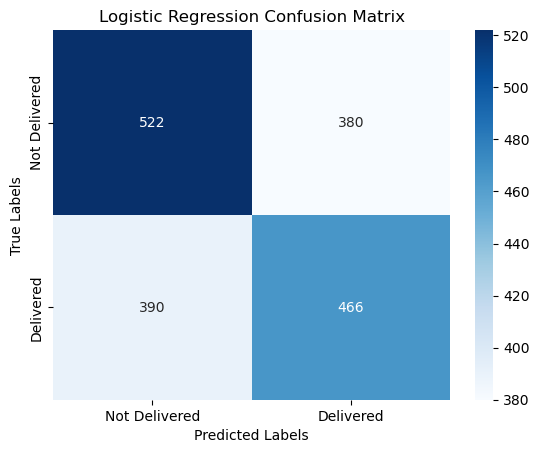

In [1569]:
plot_confusion_matrix(lr_eval_results['Confusion_Matrix'].values[0], title='Logistic Regression Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 390. The deliveries predicted on-time but are late are 380.*

### K-Nearest Neighbours - Outliers Removed

In [1570]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}
best_knn, knn_results = hypertune_model_f1(
    KNeighborsClassifier(), 
    param_grid_knn, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

Confusion Matrix:
[[551 351]
 [396 460]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       902
           1       0.57      0.54      0.55       856

    accuracy                           0.58      1758
   macro avg       0.57      0.57      0.57      1758
weighted avg       0.57      0.58      0.57      1758


Accuracy: 0.5751

F1 Score: 0.5739



In [1571]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_eval_results = evaluate_model_performance(y_test, y_pred_knn, model_name='K-Nearest Neighbours')
#all_results.append(rf_results)

Confusion Matrix for K-Nearest Neighbours:
[[551 351]
 [396 460]]

Classification Report for K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       902
           1       0.57      0.54      0.55       856

    accuracy                           0.58      1758
   macro avg       0.57      0.57      0.57      1758
weighted avg       0.57      0.58      0.57      1758


Accuracy for K-Nearest Neighbours: 0.5751
F1 Score for K-Nearest Neighbours: 0.5739
Precision for K-Nearest Neighbours: 0.5745
Recall for K-Nearest Neighbours: 0.5741



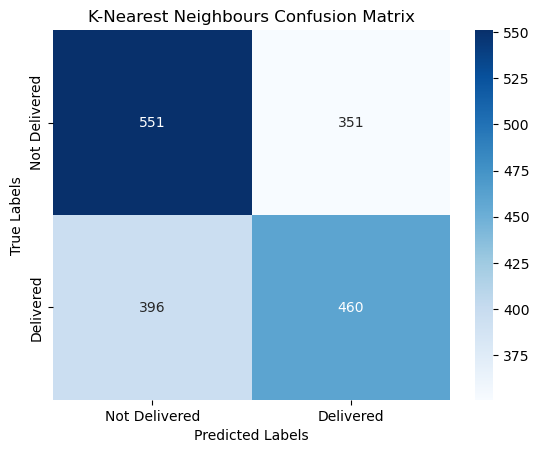

In [1572]:
plot_confusion_matrix(knn_eval_results['Confusion_Matrix'].values[0], title='K-Nearest Neighbours Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 396. The deliveries predicted on-time but are late are 351, which is again, higher than the previous models.*

### Comparing Models - Outliers Removed

In [1573]:
all_results_o_r = []

# Append each model's results
all_results_o_r.append(rf_eval_results)
all_results_o_r.append(dt_eval_results)
all_results_o_r.append(lr_eval_results)
all_results_o_r.append(knn_eval_results)

# Concatenate all DataFrames into a single DataFrame
df_all_results_o_r = pd.concat(all_results_o_r, ignore_index=True)

In [1574]:
df_all_results_o_r

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.596132,0.584348,0.601898,0.592132,"[[672, 230], [480, 376]]"
1,Decision Tree,0.597838,0.588774,0.601756,0.594361,"[[656, 246], [461, 395]]"
2,Logisitc Regression,0.562002,0.561557,0.561598,0.561553,"[[522, 380], [390, 466]]"
3,K-Nearest Neighbours,0.575085,0.573944,0.574519,0.574124,"[[551, 351], [396, 460]]"


C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\1271377826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_o_r, palette='flare_r')
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\1271377826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_o_r, palette='flare_r')


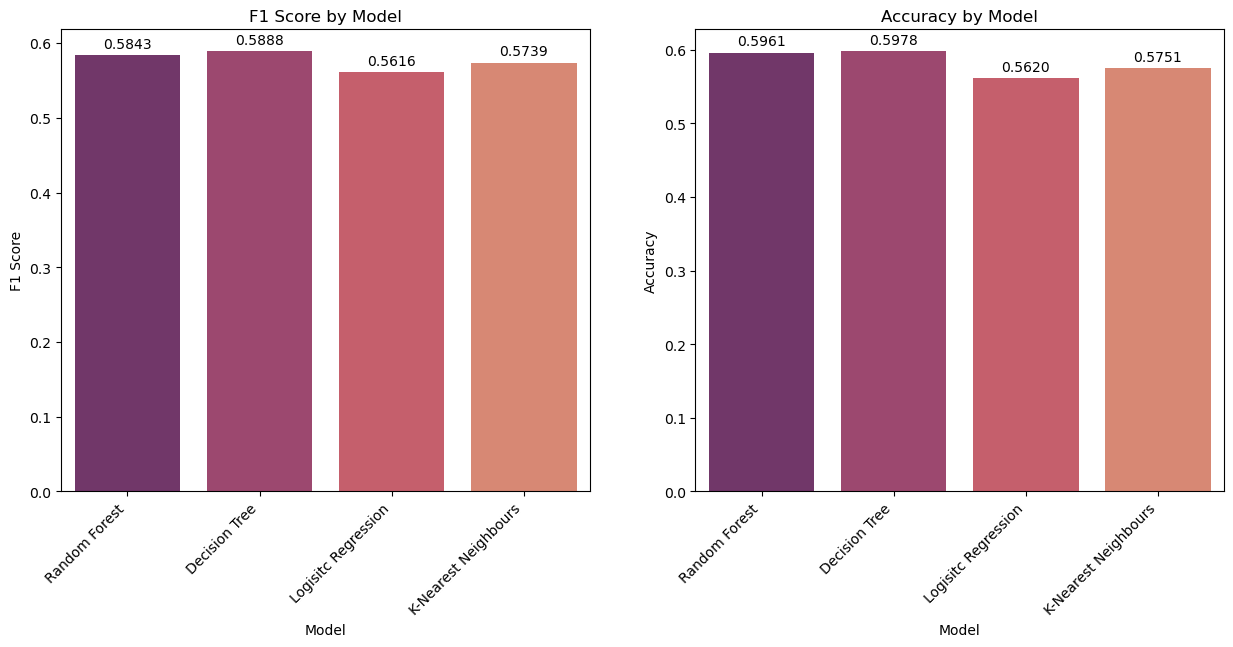

In [1575]:
# Plot F1 Score
plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_o_r, palette='flare_r')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Plot Accuracy
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_o_r, palette='flare_r')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

#plt.tight_layout()
plt.show()

***

## Scoring of all models on all datasets

*Our baseline F1 Score was 0.50 and baseline accuracy, 0.51 and as seen above all of our models on all datasets have performed better than the baseline with Ranfom Forest for the log-transformed and original datset having the highest F1 Score.*

In [1576]:
df_all_results_log

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.687727,0.687168,0.729839,0.720634,"[[803, 92], [595, 710]]"
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]"
2,Logisitc Regression,0.627273,0.625669,0.632849,0.637205,"[[618, 277], [543, 762]]"
3,K-Nearest Neighbours,0.635909,0.629695,0.629819,0.633779,"[[557, 338], [463, 842]]"


In [1577]:
df_all_results_ref

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.670455,0.670233,0.686365,0.689576,"[[709, 186], [539, 766]]"
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]"
2,Logisitc Regression,0.649545,0.638592,0.638083,0.639305,"[[523, 372], [399, 906]]"
3,K-Nearest Neighbours,0.638636,0.632730,0.632970,0.637131,"[[563, 332], [463, 842]]"


In [1578]:
df_all_results_o_r

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.596132,0.584348,0.601898,0.592132,"[[672, 230], [480, 376]]"
1,Decision Tree,0.597838,0.588774,0.601756,0.594361,"[[656, 246], [461, 395]]"
2,Logisitc Regression,0.562002,0.561557,0.561598,0.561553,"[[522, 380], [390, 466]]"
3,K-Nearest Neighbours,0.575085,0.573944,0.574519,0.574124,"[[551, 351], [396, 460]]"


In [1579]:
df_all_results_log['Dataset'] = 'Log-Transformed'
df_all_results_ref['Dataset'] = 'Reference'
df_all_results_o_r['Dataset'] = 'Outliers Removed'
df_combined = pd.concat([df_all_results_log, df_all_results_ref, df_all_results_o_r], ignore_index=True)

In [1580]:
df_combined

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix,Dataset
0,Random Forest,0.687727,0.687168,0.729839,0.720634,"[[803, 92], [595, 710]]",Log-Transformed
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]",Log-Transformed
2,Logisitc Regression,0.627273,0.625669,0.632849,0.637205,"[[618, 277], [543, 762]]",Log-Transformed
3,K-Nearest Neighbours,0.635909,0.629695,0.629819,0.633779,"[[557, 338], [463, 842]]",Log-Transformed
4,Random Forest,0.670455,0.670233,0.686365,0.689576,"[[709, 186], [539, 766]]",Reference
5,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]",Reference
6,Logisitc Regression,0.649545,0.638592,0.638083,0.639305,"[[523, 372], [399, 906]]",Reference
7,K-Nearest Neighbours,0.638636,0.632730,0.632970,0.637131,"[[563, 332], [463, 842]]",Reference
8,Random Forest,0.596132,0.584348,0.601898,0.592132,"[[672, 230], [480, 376]]",Outliers Removed
9,Decision Tree,0.597838,0.588774,0.601756,0.594361,"[[656, 246], [461, 395]]",Outliers Removed


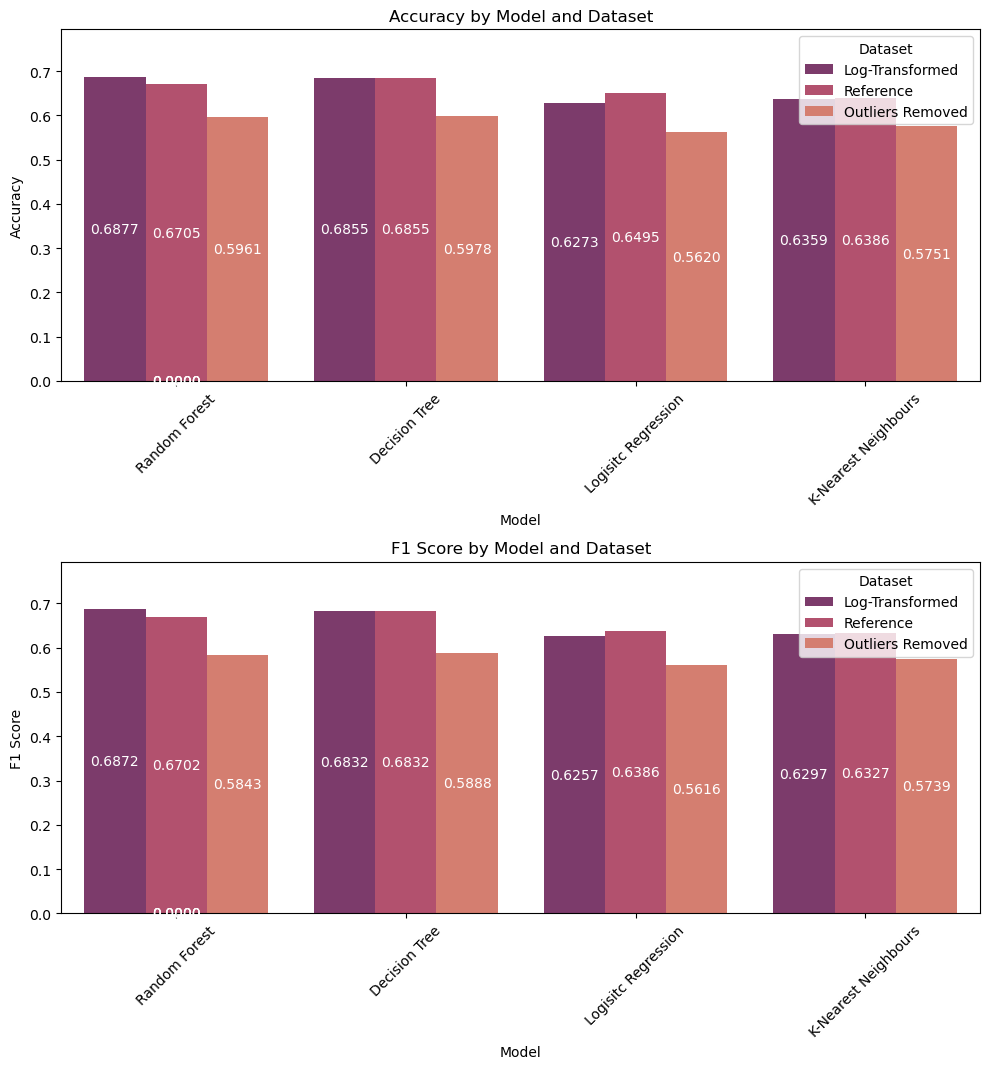

In [1581]:
# Plot Accuracy and F1 Score
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_combined, palette='flare_r', ax=ax[0])
ax[0].set_title('Accuracy by Model and Dataset')
ax[0].tick_params(axis='x', rotation=45)

# Adjust y-axis limits for more space
accuracy_ylim = ax[0].get_ylim()
ax[0].set_ylim(accuracy_ylim[0], accuracy_ylim[1] * 1.1)  # Increase y-axis limit by 10%

# Add data labels for Accuracy
for p in ax[0].patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[0].annotate(f'{height:.4f}', xy=(x, y), ha='center', va='center',
                   fontsize=10, color='white')

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', hue='Dataset', data=df_combined, palette='flare_r', ax=ax[1])
ax[1].set_title('F1 Score by Model and Dataset')
ax[1].tick_params(axis='x', rotation=45)

# Adjust y-axis limits for more space
f1_score_ylim = ax[1].get_ylim()
ax[1].set_ylim(f1_score_ylim[0], f1_score_ylim[1] * 1.1)  # Increase y-axis limit by 10%

# Add data labels for F1 Score
for p in ax[1].patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[1].annotate(f'{height:.4f}', xy=(x, y), ha='center', va='center',
                   fontsize=10, color='white')

# Add legend at the bottom
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the plot area to make space for the legend
plt.show()

Based on the model performance and confusion matrix analysis across the three datasets (Log-Transformed, Reference, Outliers Removed), here are the key takeaways:
- **Model Performance**:
  * Decision Tree consistently outperforms other models in minimizing the misclassification of delayed orders as on-time, making it the best option for handling critical errors related to late deliveries.
  * Random Forest performs well but is slightly less effective than the Decision Tree in minimizing false positives, especially after outlier removal.
  * Logistic Regression and K-Nearest Neighbors (KNN) struggle across all datasets, often misclassifying a significant number of delayed orders as on-time, making them less suitable for this task.

- **Dataset Comparison**:
  * The Log-Transformed dataset consistently produces the best results, particularly for Decision Tree and Random Forest, as these models excel at handling transformed features.
  * The Reference dataset shows similar trends, with Decision Tree outperforming others, but the performance gap is narrower compared to the Log-Transformed dataset.
  * Outliers Removed dataset yields poorer performance for all models. Removing outliers leads to higher misclassification rates, suggesting that the outliers might carry crucial information related to delivery delays.

- **False Positives (Delayed Orders Predicted as On-Time)**:
  * Minimizing false positives is crucial, as predicting delayed orders as on-time can result in unsatisfied customers. The Decision Tree is the most reliable model for minimizing this error, particularly in the Log-Transformed and Reference datasets.
  * Removing outliers harms the ability of the models to correctly predict delayed orders, indicating that outliers might play a significant role in identifying late deliveries.

**Conclusion:**

From the above results, we see that removing outliers significantly decreases model performances in general. This means that the outliers contain important information that is vital for predictions.

The Decision Tree model is the most effective at handling the key issue of predicting delayed orders, particularly with log-transformed data. Random Forest also performs well, but outlier removal generally reduces predictive accuracy. Logistic Regression and KNN are not well-suited for this task, and retaining outliers might be important for improving model performance.

# Feature Importance using RANDOM FOREST

Now, in our earlier data preprocessing, we transformed out features and removed the ones which did not have significance according to the VIF and Chi-Square test.

Let us carry out extraction feature importance using a random forest model on our original dataset to see if we can get better results.

In [1582]:
df_commerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [1583]:
df_feat_imp = df_commerce.copy()

In [1584]:
df_feat_imp.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [1585]:
df_feat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [1586]:
df_feat_imp.drop('ID', axis=1, inplace=True)

In [1587]:
df_feat_imp['Customer_rating'] = df_feat_imp['Customer_rating'].astype('object')

In [1588]:
df_feat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  object
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


*Let us encode.*

In [1589]:
num_cols_FI = []
cat_cols_FI = []
for i in df_feat_imp.columns:
    if df_feat_imp[str(i)].dtype == 'int64':
        num_cols_FI.append(i)
    else:
        cat_cols_FI.append(i)

In [1590]:
print(num_cols_FI)
print(cat_cols_FI)

['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']


In [1591]:
df_feat_imp_encoded = pd.get_dummies(data=df_feat_imp, 
                                     columns=cat_cols_FI,
                                    drop_first=True)
df_feat_imp_encoded.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5', 'Product_importance_low',
       'Product_importance_medium', 'Gender_M'],
      dtype='object')

Now, we have encoded our data. \
Let's drop the target column.

In [1592]:
X = df_feat_imp_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_feat_imp_encoded['Reached.on.Time_Y.N']
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                      Feature  Importance
4               Weight_in_gms    0.282081
3            Discount_offered    0.218863
1         Cost_of_the_Product    0.174132
0         Customer_care_calls    0.058926
2             Prior_purchases    0.058831
17                   Gender_M    0.024359
10      Mode_of_Shipment_Ship    0.020248
8           Warehouse_block_F    0.018119
15     Product_importance_low    0.016113
16  Product_importance_medium    0.015322
13          Customer_rating_4    0.015299
14          Customer_rating_5    0.014465
11          Customer_rating_2    0.014362
6           Warehouse_block_C    0.014324
5           Warehouse_block_B    0.013976
12          Customer_rating_3    0.013966
7           Warehouse_block_D    0.013540
9       Mode_of_Shipment_Road    0.013074


<Axes: xlabel='Importance', ylabel='Feature'>

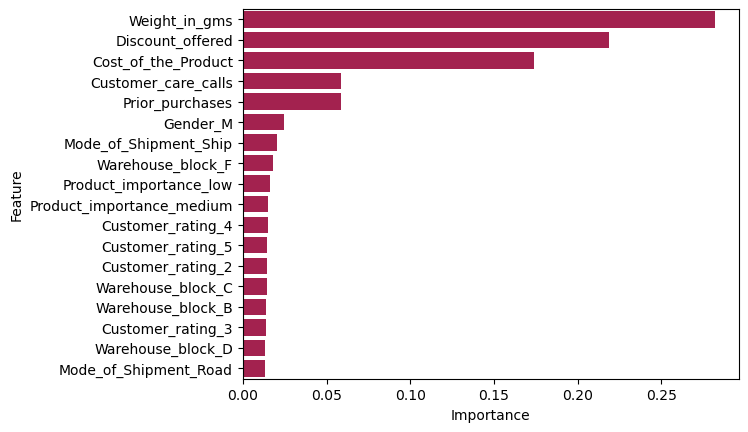

In [1593]:
sns.barplot(y='Feature', x='Importance', data=feature_importances)

From this, we can confirm that the columns `Mode_of_Shipment`, `Warehouse_block`, `Gender`, `Product_importance` and `Customer_rating` are not important to consider for modelling.

Let us try modelling after removing these columns to see if we yield better results.

## Original/Reference Data

### Encoding and Scaling

In [1594]:
df_feat_imp.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [1595]:
df_feat_imp_encoded.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5', 'Product_importance_low',
       'Product_importance_medium', 'Gender_M'],
      dtype='object')

From this, we know we have to remove some columns so let us do that.

In [1596]:
to_remove = ['Mode_of_Shipment', 'Warehouse_block', 'Gender', 'Product_importance','Customer_rating']

In [1597]:
df_feat_imp.drop(to_remove, axis=1, inplace=True)

In [1598]:
df_feat_imp.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N'],
      dtype='object')

From here on, we will follow our previous process.

In [1600]:
np.quantile(df_feat_imp['Cost_of_the_Product'], np.linspace(0, 1, 7))

array([ 96., 156., 184., 214., 240., 261., 310.])

In [1601]:
# Product cost class creation
def cost_classifier(Cost_of_the_Product):
    if Cost_of_the_Product < 185:
        return 'low'
    elif Cost_of_the_Product < 241:
        return 'medium'
    else:
        return 'high'

df_feat_imp['Cost_class'] = df_feat_imp['Cost_of_the_Product'].apply(cost_classifier)

In [1602]:
# Prior purchase class creation
def prior_purchase_classifier(Prior_purchases):
    if Prior_purchases < 4:
        return 'low'
    elif Prior_purchases < 7:
        return 'medium'
    else:
        return 'high'

df_feat_imp['Prior_purchase_class'] = df_feat_imp['Prior_purchases'].apply(prior_purchase_classifier)

In [1603]:
df_feat_imp.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Cost_class', 'Prior_purchase_class'],
      dtype='object')

In [1604]:
num_cols_FI = []
cat_cols_FI = []
for i in df_feat_imp.columns:
    if df_feat_imp[str(i)].dtype == 'int64':
        num_cols_FI.append(i)
    else:
        cat_cols_FI.append(i)

print(num_cols_FI)
print(cat_cols_FI)

['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
['Cost_class', 'Prior_purchase_class']


*Since we have transformed `Cost_of_the_Product` and `Prior_purchases` into their respective classes, let us remove the original columns.*

In [1659]:
df_feat_imp.drop(['Cost_of_the_Product','Prior_purchases'], axis=1, inplace=True)

In [1660]:
df_feat_imp.columns

Index(['Customer_care_calls', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Cost_class', 'Prior_purchase_class'],
      dtype='object')

In [1661]:
df_feat_imp_encoded = pd.get_dummies(data=df_feat_imp, 
                                     columns=cat_cols_FI,
                                    drop_first=True)
df_feat_imp_encoded.columns

Index(['Customer_care_calls', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

In [1662]:
X = df_feat_imp_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_feat_imp_encoded['Reached.on.Time_Y.N']

In [1663]:
X.columns

Index(['Customer_care_calls', 'Discount_offered', 'Weight_in_gms',
       'Cost_class_low', 'Cost_class_medium', 'Prior_purchase_class_low',
       'Prior_purchase_class_medium'],
      dtype='object')

*Now, we have encoded our data. So let us move onto splitting out dataset into X and y(Target variable).*

*Let's split our dataset into training and testing data.*

In [1664]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled data
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (8799, 7)
Scaled testing set shape: (2200, 7)


#### Baseline F1 Score

In [1665]:
# For imbalanced dataset example
baseline_model = DummyClassifier(strategy='uniform', random_state=42)
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)
baseline_f1score = f1_score(y_test, y_pred_baseline)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline F1 Score:", baseline_f1score)
print("Baseline Accuracy:", baseline_accuracy)

Baseline F1 Score: 0.5461409395973155
Baseline Accuracy: 0.5081818181818182


*This is the baseline accuracy we will try to improve with our models.*

### Random Forest Modelling

In [1666]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

best_rf, rf_results = hypertune_model_f1(
    RandomForestClassifier(random_state=42), 
    param_grid_rf, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found for RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
[[731 164]
 [532 773]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       895
           1       0.82      0.59      0.69      1305

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200


Accuracy: 0.6836

F1 Score: 0.6835



In [1667]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_eval_results = evaluate_model_performance(y_test, y_pred_rf, model_name='Random Forest')
#all_results.append(rf_results)

Confusion Matrix for Random Forest:
[[731 164]
 [532 773]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       895
           1       0.82      0.59      0.69      1305

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200


Accuracy for Random Forest: 0.6836
F1 Score for Random Forest: 0.6835
Precision for Random Forest: 0.7019
Recall for Random Forest: 0.7045



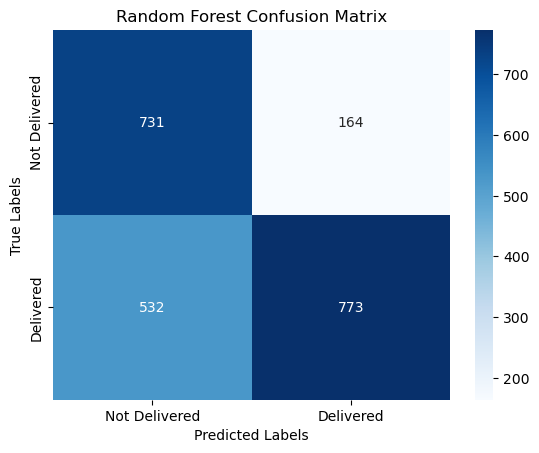

In [1668]:
plot_confusion_matrix(rf_eval_results['Confusion_Matrix'].values[0], title='Random Forest Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 532 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 164.*


### Decision Tree Modelling

In [1669]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

best_dt, dt_results = hypertune_model_f1(
    DecisionTreeClassifier(random_state=42), 
    param_grid_dt, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

Confusion Matrix:
[[812  83]
 [611 694]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.89      0.53      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.68      0.68      2200


Accuracy: 0.6845

F1 Score: 0.6836



In [1670]:
y_pred_dt = best_dt.predict(X_test_scaled)
dt_eval_results = evaluate_model_performance(y_test, y_pred_dt, model_name='Decision Tree')
#all_results.append(rf_results)

Confusion Matrix for Decision Tree:
[[812  83]
 [611 694]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.89      0.53      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.68      0.68      2200


Accuracy for Decision Tree: 0.6845
F1 Score for Decision Tree: 0.6836
Precision for Decision Tree: 0.7319
Recall for Decision Tree: 0.7195



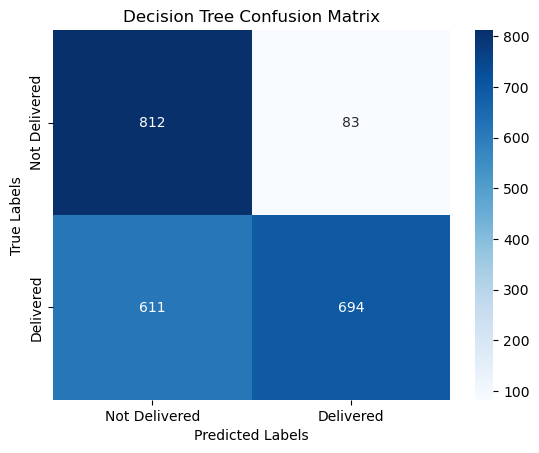

In [1671]:
plot_confusion_matrix(dt_eval_results['Confusion_Matrix'].values[0], title='Decision Tree Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 611 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 83. This value is better than our Random Forest value.*

### Logistic Regression

In [1672]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
best_lr, lr_results = hypertune_model_f1(
    LogisticRegression(), 
    param_grid_lr, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found for LogisticRegression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
[[522 373]
 [395 910]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       895
           1       0.71      0.70      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


Accuracy: 0.6509

F1 Score: 0.6397



In [1673]:
y_pred_lr = best_lr.predict(X_test_scaled)
lr_eval_results = evaluate_model_performance(y_test, y_pred_lr, model_name='Logisitc Regression')
#all_results.append(rf_results)

Confusion Matrix for Logisitc Regression:
[[522 373]
 [395 910]]

Classification Report for Logisitc Regression:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       895
           1       0.71      0.70      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


Accuracy for Logisitc Regression: 0.6509
F1 Score for Logisitc Regression: 0.6397
Precision for Logisitc Regression: 0.6393
Recall for Logisitc Regression: 0.6403



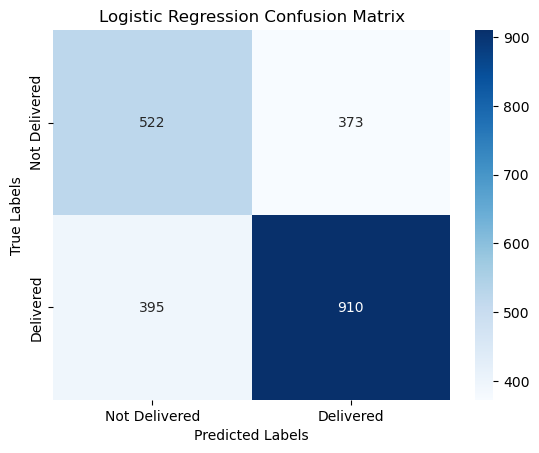

In [1674]:
plot_confusion_matrix(lr_eval_results['Confusion_Matrix'].values[0], title='Logistic Regression Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 395 which is a lot lower than our previous models. However, the deliveries predicted on-time but are late are 373, which is much higher than our RF and DT models.*

### K-Nearest Neighbours

In [1675]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}
best_knn, knn_results = hypertune_model_f1(
    KNeighborsClassifier(), 
    param_grid_knn, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix:
[[603 292]
 [427 878]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       895
           1       0.75      0.67      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.68      2200


Accuracy: 0.6732

F1 Score: 0.6680



In [1676]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_eval_results = evaluate_model_performance(y_test, y_pred_knn, model_name='K-Nearest Neighbours')
#all_results.append(rf_results)

Confusion Matrix for K-Nearest Neighbours:
[[603 292]
 [427 878]]

Classification Report for K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       895
           1       0.75      0.67      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.68      2200


Accuracy for K-Nearest Neighbours: 0.6732
F1 Score for K-Nearest Neighbours: 0.6680
Precision for K-Nearest Neighbours: 0.6679
Recall for K-Nearest Neighbours: 0.6733



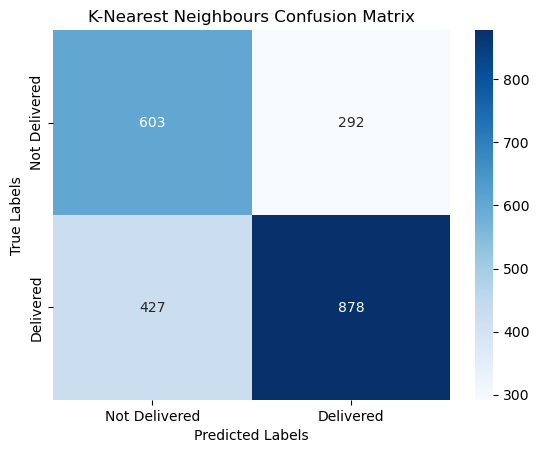

In [1677]:
plot_confusion_matrix(knn_eval_results['Confusion_Matrix'].values[0], title='K-Nearest Neighbours Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 427 which is worse compared to Logistic Regression model. The deliveries predicted on-time but are late are 292, which is slightly lesser than our LR model.*

### Comparing models - Original Data

In [1678]:
all_results_ref_FI = []

# Append each model's results
all_results_ref_FI.append(rf_eval_results)
all_results_ref_FI.append(dt_eval_results)
all_results_ref_FI.append(lr_eval_results)
all_results_ref_FI.append(knn_eval_results)

# Concatenate all DataFrames into a single DataFrame
df_all_results_ref_FI = pd.concat(all_results_ref_FI, ignore_index=True)

In [1679]:
df_all_results_ref

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix,Dataset
0,Random Forest,0.670455,0.670233,0.686365,0.689576,"[[709, 186], [539, 766]]",Reference
1,Decision Tree,0.685455,0.683239,0.749625,0.726266,"[[846, 49], [643, 662]]",Reference
2,Logisitc Regression,0.649545,0.638592,0.638083,0.639305,"[[523, 372], [399, 906]]",Reference
3,K-Nearest Neighbours,0.638636,0.632730,0.632970,0.637131,"[[563, 332], [463, 842]]",Reference


C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\2230304948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_ref, palette='flare_r')
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\2230304948.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_ref, palette='flare_r')


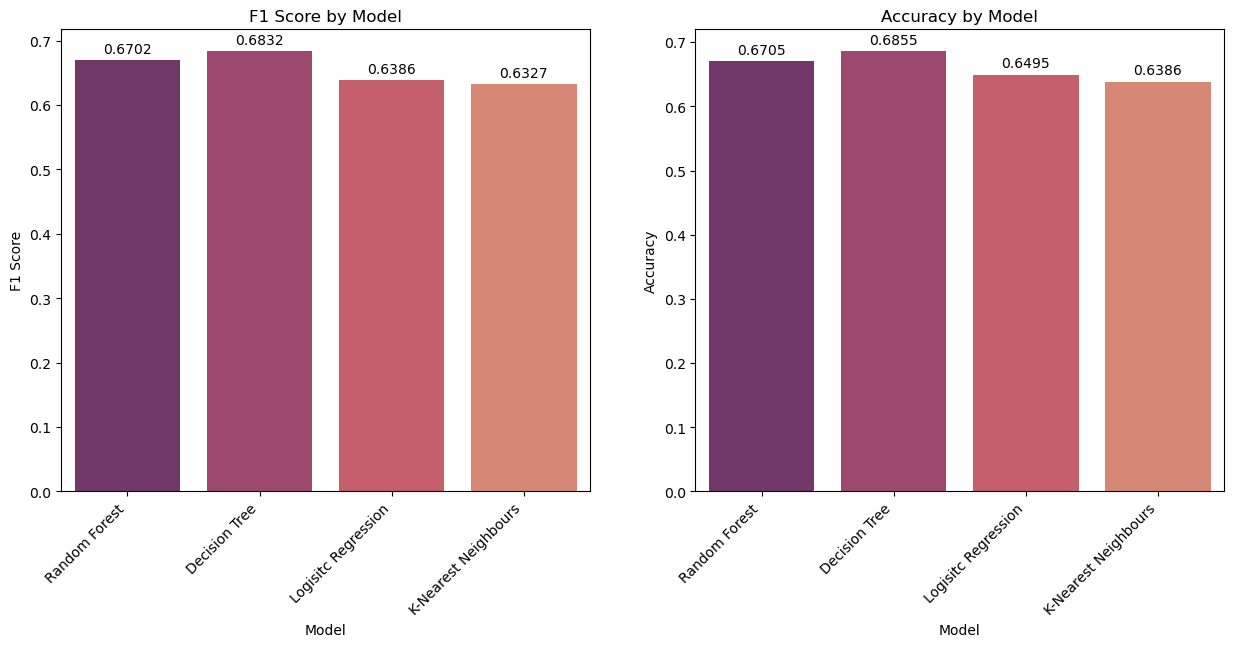

In [1680]:
# Plot F1 Score
plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_ref, palette='flare_r')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Plot Accuracy
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_ref, palette='flare_r')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

#plt.tight_layout()
plt.show()

## Outliers Handled - Log-Transformed Data

In [1681]:
df_feat_imp_o_t.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Cost_class',
       'Prior_purchase_class', 'Discount_offered_log'],
      dtype='object')

In [1626]:
#df_feat_imp_o_t.drop('Discount_offered', axis=1, inplace=True)

*Here, let us rename this into df_log_FI for interpretability.*

In [1628]:
df_log_FI = df_feat_imp_o_t.copy()
df_log_FI.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Cost_class',
       'Prior_purchase_class', 'Discount_offered_log'],
      dtype='object')

*Now, we will follow the same process, ie., encoding, scaling and so, to get our final results of classification.*

In [1682]:
num_cols_log_FI = []
cat_cols_log_FI = []
for i in df_log_FI.columns:
    if (df_log_FI[str(i)].dtype == 'int64') | (df_log_FI[str(i)].dtype == 'float64'):
        num_cols_log_FI.append(i)
    else:
        cat_cols_log_FI.append(i)

print(num_cols_log_FI)
print(cat_cols_log_FI)

['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms', 'Reached.on.Time_Y.N', 'Discount_offered_log']
['Cost_class', 'Prior_purchase_class']


*Again, since `Cost_of_the_Product` and `Prior_purchases` are transformed into their respective classes, let us remove the original columns.*

In [1683]:
df_log_FI.drop(['Cost_of_the_Product', 'Prior_purchases'], axis=1, inplace=True)

In [1684]:
df_log_FI.columns

Index(['Customer_care_calls', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Cost_class', 'Prior_purchase_class', 'Discount_offered_log'],
      dtype='object')

In [1685]:
# Perform one-hot encoding
df_log_FI_encoded = pd.get_dummies(df_log_FI, columns=cat_cols_log_FI, drop_first=True)

In [1686]:
df_log_FI_encoded.columns

Index(['Customer_care_calls', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Discount_offered_log', 'Cost_class_low', 'Cost_class_medium',
       'Prior_purchase_class_low', 'Prior_purchase_class_medium'],
      dtype='object')

*Now, we have encoded our data. So let us move onto splitting out dataset into X and y(Target variable).*

In [1687]:
X = df_log_FI_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_log_FI_encoded['Reached.on.Time_Y.N']

In [1688]:
X.columns

Index(['Customer_care_calls', 'Weight_in_gms', 'Discount_offered_log',
       'Cost_class_low', 'Cost_class_medium', 'Prior_purchase_class_low',
       'Prior_purchase_class_medium'],
      dtype='object')

#### Encoding and Scaling

In [1689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 7)
(2200, 7)
(8799,)
(2200,)


In [1690]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled data
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (8799, 7)
Scaled testing set shape: (2200, 7)


#### Baseline F1 Score and Accuracy

In [1691]:
# For imbalanced dataset example
baseline_model = DummyClassifier(strategy='uniform', random_state=42)
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)
baseline_f1score = f1_score(y_test, y_pred_baseline)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline F1 Score:", baseline_f1score)
print("Baseline Accuracy:", baseline_accuracy)

Baseline F1 Score: 0.5461409395973155
Baseline Accuracy: 0.5081818181818182


#### Random Forest Modelling - Log Transformed

In [1692]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

best_rf, rf_results = hypertune_model_f1(
    RandomForestClassifier(random_state=42), 
    param_grid_rf, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best parameters found for RandomForestClassifier: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Confusion Matrix:
[[859  36]
 [647 658]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.96      0.72       895
           1       0.95      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200


Accuracy: 0.6895

F1 Score: 0.6869



In [1693]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_eval_results = evaluate_model_performance(y_test, y_pred_rf, model_name='Random Forest')
#all_results.append(rf_results)

Confusion Matrix for Random Forest:
[[859  36]
 [647 658]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.96      0.72       895
           1       0.95      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200


Accuracy for Random Forest: 0.6895
F1 Score for Random Forest: 0.6869
Precision for Random Forest: 0.7593
Recall for Random Forest: 0.7320



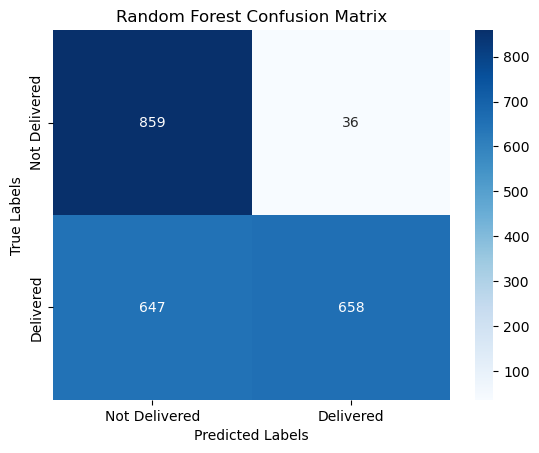

In [1694]:
plot_confusion_matrix(rf_eval_results['Confusion_Matrix'].values[0], title='Random Forest Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 647 which is fine because regardless, the shipment is on-time. The deliveries predicted on-time but are late are 36. This is a decent number of records.*


#### Decision Tree Modelling - Log Transformed

In [1695]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

best_dt, dt_results = hypertune_model_f1(
    DecisionTreeClassifier(random_state=42), 
    param_grid_dt, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

Confusion Matrix:
[[812  83]
 [611 694]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.89      0.53      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.68      0.68      2200


Accuracy: 0.6845

F1 Score: 0.6836



In [1696]:
y_pred_dt = best_dt.predict(X_test_scaled)
dt_eval_results = evaluate_model_performance(y_test, y_pred_dt, model_name='Decision Tree')
#all_results.append(rf_results)

Confusion Matrix for Decision Tree:
[[812  83]
 [611 694]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.89      0.53      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.68      0.68      2200


Accuracy for Decision Tree: 0.6845
F1 Score for Decision Tree: 0.6836
Precision for Decision Tree: 0.7319
Recall for Decision Tree: 0.7195



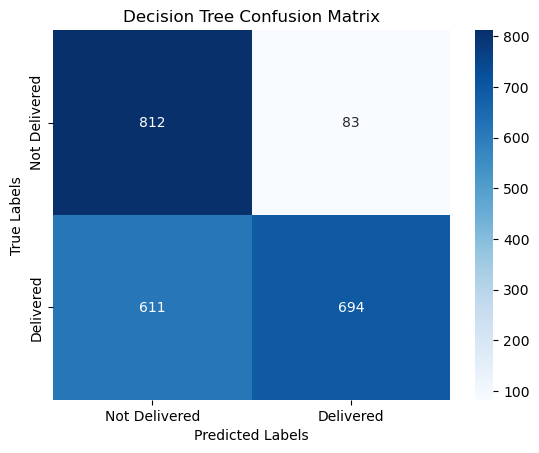

In [1697]:
plot_confusion_matrix(dt_eval_results['Confusion_Matrix'].values[0], title='Decision Tree Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 611 which is slightly better than RF, regardless, the shipment is on-time. The deliveries predicted on-time but are late are 83.*

#### Logistic Regression - Log Transformed

In [1698]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
best_lr, lr_results = hypertune_model_f1(
    LogisticRegression(random_state=42), 
    param_grid_lr, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found for LogisticRegression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
[[618 277]
 [543 762]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       895
           1       0.73      0.58      0.65      1305

    accuracy                           0.63      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.63      0.63      2200


Accuracy: 0.6273

F1 Score: 0.6257



In [1699]:
y_pred_lr = best_lr.predict(X_test_scaled)
lr_eval_results = evaluate_model_performance(y_test, y_pred_lr, model_name='Logisitc Regression')
#all_results.append(rf_results)

Confusion Matrix for Logisitc Regression:
[[618 277]
 [543 762]]

Classification Report for Logisitc Regression:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       895
           1       0.73      0.58      0.65      1305

    accuracy                           0.63      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.63      0.63      2200


Accuracy for Logisitc Regression: 0.6273
F1 Score for Logisitc Regression: 0.6257
Precision for Logisitc Regression: 0.6328
Recall for Logisitc Regression: 0.6372



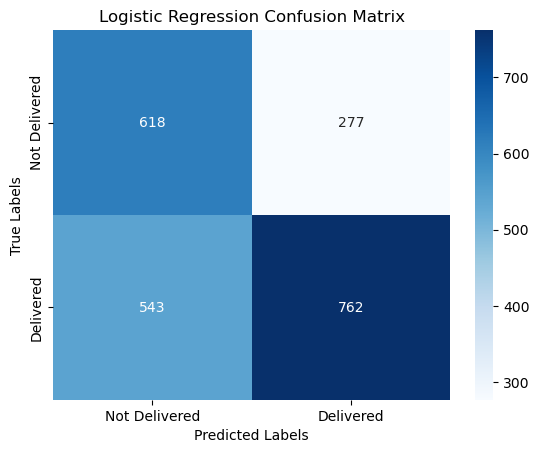

In [1700]:
plot_confusion_matrix(lr_eval_results['Confusion_Matrix'].values[0], title='Logistic Regression Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 543 which is better than our DT model. However, the deliveries predicted on-time but are late are 277, which is much higher than our RF and DT models.*

#### K-Nearest Neighbours - Log Transformed

In [1701]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}
best_knn, knn_results = hypertune_model_f1(
    KNeighborsClassifier(), 
    param_grid_knn, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test, 
    search_type='grid', 
    scoring='f1_macro'
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix:
[[596 299]
 [445 860]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62       895
           1       0.74      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200


Accuracy: 0.6618

F1 Score: 0.6569



In [1702]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_eval_results = evaluate_model_performance(y_test, y_pred_knn, model_name='K-Nearest Neighbours')
#all_results.append(rf_results)

Confusion Matrix for K-Nearest Neighbours:
[[596 299]
 [445 860]]

Classification Report for K-Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62       895
           1       0.74      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200


Accuracy for K-Nearest Neighbours: 0.6618
F1 Score for K-Nearest Neighbours: 0.6569
Precision for K-Nearest Neighbours: 0.6573
Recall for K-Nearest Neighbours: 0.6625



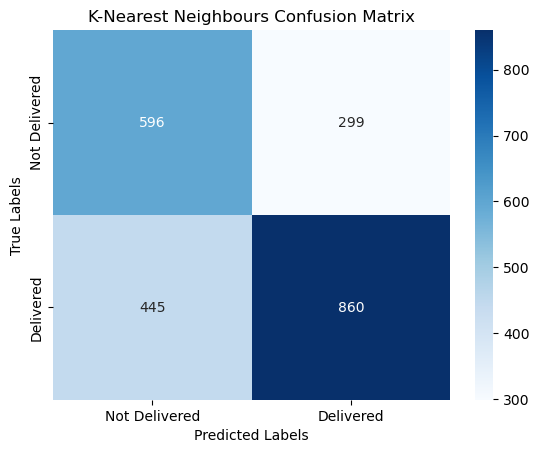

In [1703]:
plot_confusion_matrix(knn_eval_results['Confusion_Matrix'].values[0], title='K-Nearest Neighbours Confusion Matrix')

*Here, the number of deliveries that are predicted late but actually are on time are 445 which is better compared to Logistic Regression model. The deliveries predicted on-time but are late are 299, which is slightly higher than our LR model.*

### Comparing Models - Log Transformed Data

In [1704]:
all_results_log_FI = []

# Append each model's results
all_results_log_FI.append(rf_eval_results)
all_results_log_FI.append(dt_eval_results)
all_results_log_FI.append(lr_eval_results)
all_results_log_FI.append(knn_eval_results)

# Concatenate all DataFrames into a single DataFrame
df_all_results_log_FI = pd.concat(all_results_log_FI, ignore_index=True)

In [1706]:
df_all_results_log_FI

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix
0,Random Forest,0.689545,0.686932,0.759256,0.731996,"[[859, 36], [647, 658]]"
1,Decision Tree,0.684545,0.683635,0.731902,0.719532,"[[812, 83], [611, 694]]"
2,Logisitc Regression,0.627273,0.625669,0.632849,0.637205,"[[618, 277], [543, 762]]"
3,K-Nearest Neighbours,0.661818,0.656877,0.657273,0.662463,"[[596, 299], [445, 860]]"


C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3170128741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_log_FI, palette='flare_r')
C:\Users\rinit\AppData\Local\Temp\ipykernel_29000\3170128741.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_log_FI, palette='flare_r')


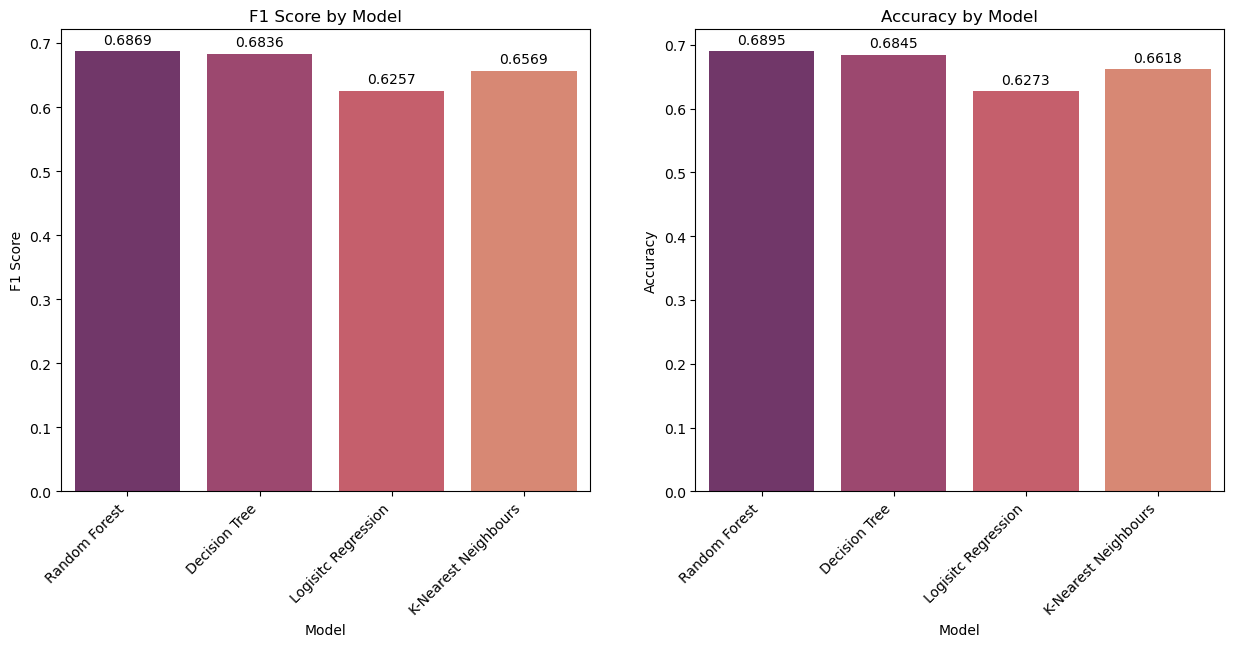

In [1707]:
# Plot F1 Score
plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='F1 Score', data=df_all_results_log_FI, palette='flare_r')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Plot Accuracy
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='Accuracy', data=df_all_results_log_FI, palette='flare_r')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')

# Add value annotations
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.4f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

#plt.tight_layout()
plt.show()

## Scoring of models on both datasets

In [1708]:
df_all_results_log_FI['Dataset'] = 'Log-Transformed'
df_all_results_ref_FI['Dataset'] = 'Reference'
df_combined_FI = pd.concat([df_all_results_log_FI, df_all_results_ref_FI], ignore_index=True)

In [1709]:
df_combined_FI

,Model,Accuracy,F1 Score,Precision,Recall,Confusion_Matrix,Dataset
0,Random Forest,0.689545,0.686932,0.759256,0.731996,"[[859, 36], [647, 658]]",Log-Transformed
1,Decision Tree,0.684545,0.683635,0.731902,0.719532,"[[812, 83], [611, 694]]",Log-Transformed
2,Logisitc Regression,0.627273,0.625669,0.632849,0.637205,"[[618, 277], [543, 762]]",Log-Transformed
3,K-Nearest Neighbours,0.661818,0.656877,0.657273,0.662463,"[[596, 299], [445, 860]]",Log-Transformed
4,Random Forest,0.683636,0.683521,0.701877,0.704548,"[[731, 164], [532, 773]]",Reference
5,Decision Tree,0.684545,0.683635,0.731902,0.719532,"[[812, 83], [611, 694]]",Reference
6,Logisitc Regression,0.650909,0.639702,0.639261,0.640279,"[[522, 373], [395, 910]]",Reference
7,K-Nearest Neighbours,0.673182,0.667994,0.667932,0.673270,"[[603, 292], [427, 878]]",Reference


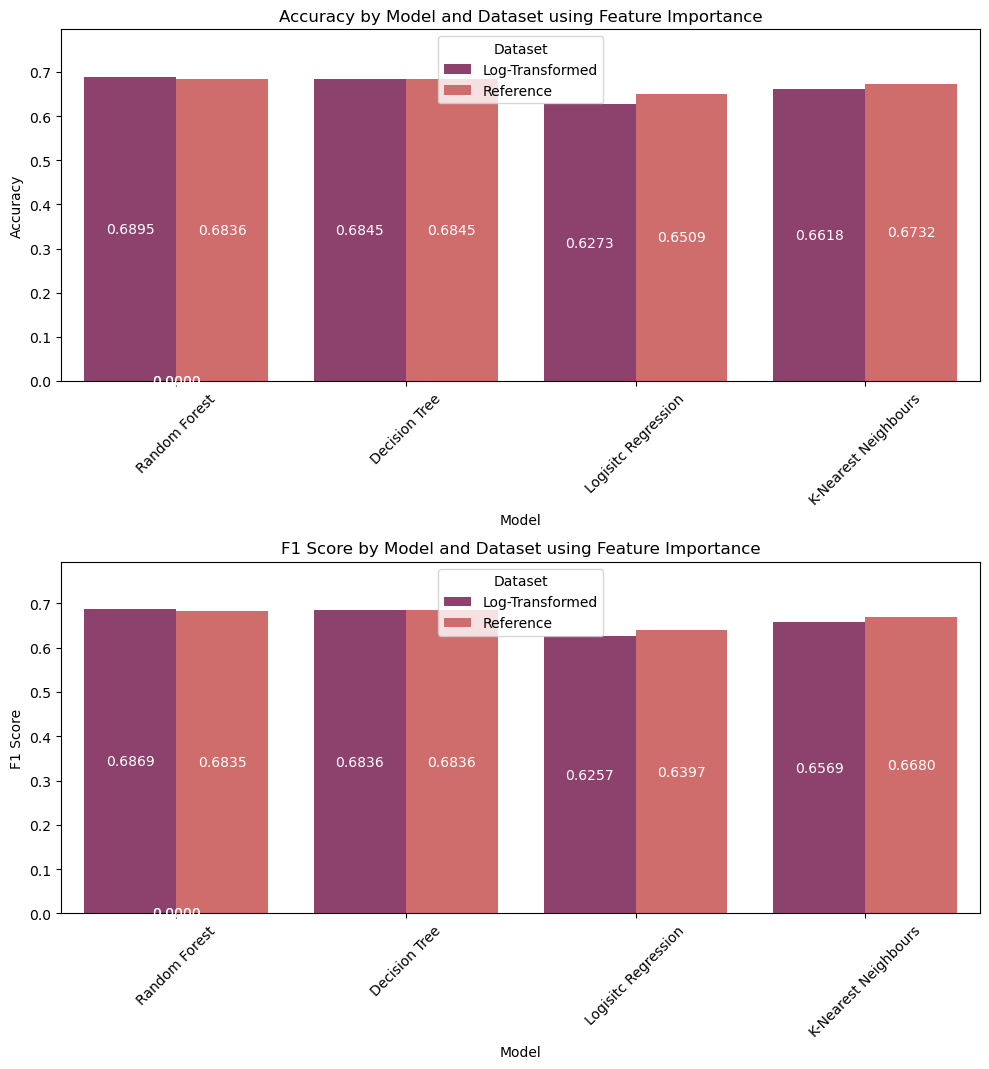

In [1710]:
# Plot Accuracy and F1 Score
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_combined_FI, palette='flare_r', ax=ax[0])
ax[0].set_title('Accuracy by Model and Dataset using Feature Importance')
ax[0].tick_params(axis='x', rotation=45)

# Adjust y-axis limits for more space
accuracy_ylim = ax[0].get_ylim()
ax[0].set_ylim(accuracy_ylim[0], accuracy_ylim[1] * 1.1)  # Increase y-axis limit by 10%

# Add data labels for Accuracy
for p in ax[0].patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[0].annotate(f'{height:.4f}', xy=(x, y), ha='center', va='center',
                   fontsize=10, color='white')

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', hue='Dataset', data=df_combined_FI, palette='flare_r', ax=ax[1])
ax[1].set_title('F1 Score by Model and Dataset using Feature Importance')
ax[1].tick_params(axis='x', rotation=45)

# Adjust y-axis limits for more space
f1_score_ylim = ax[1].get_ylim()
ax[1].set_ylim(f1_score_ylim[0], f1_score_ylim[1] * 1.1)  # Increase y-axis limit by 10%

# Add data labels for F1 Score
for p in ax[1].patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax[1].annotate(f'{height:.4f}', xy=(x, y), ha='center', va='center',
                   fontsize=10, color='white')

# Add legend at the bottom
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the plot area to make space for the legend
plt.show()

1. **Random Forest** consistently outperforms the other models in both datasets, achieving the highest accuracy and F1 scores. It demonstrates strong precision and recall, making it the most reliable model for predicting whether a product reaches on time.

2. **Decision Tree** performs similarly to Random Forest, but slightly underperforms in both accuracy and F1 scores. It remains a solid choice but is slightly less robust than Random Forest.

3. **Logistic Regression** shows the lowest accuracy and F1 scores among all models, indicating that it struggles with this particular dataset. Its performance improves slightly after log transformation but remains the weakest model overall.

4. **K-Nearest Neighbors (KNN)** performs moderately well, with accuracy and F1 scores lower than Random Forest and Decision Tree but higher than Logistic Regression. It shows consistency across both datasets, but its precision and recall are not as strong as those of Random Forest.

5. **Impact of Log Transformation**: The log-transformed dataset generally leads to a slight improvement in the models' performance, especially for Logistic Regression, although the overall ranking of model performance remains consistent.

In summary, Random Forest is the best-performing model, while Logistic Regression struggles the most with this data. The log transformation slightly enhances model performance but does not drastically change the model rankings.